# EDA - Exploratory Data Analysis

In [1]:
import scipy.stats as stats
from scipy.stats import ks_2samp
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import locale
from matplotlib.colors import LinearSegmentedColormap

In [2]:
sns.set_theme()

# Estatísticas Básicas

In [3]:
con = sqlite3.connect("projetocredito.db") # Cria um banco de dados SQLite.

In [4]:
cur = con.cursor() # Armazena o cursor.

In [5]:
df_geral = pd.read_sql_query("""
    SELECT *
    FROM credit_risk_dataset
""", con) # Cria um novo DataFrame e armazena a consulta SQL. 

df_geral.head() # Apresenta o DataFrame. 

,Idade,Renda_Anual,Status_Propriedade_Imovel,Modalidade_Credito,Nivel_Risco,Valor_Emprestimo,Taxa_Juros,Status_Inadimplencia_Emprestimo,Percentual_Renda_Comprometida,Inadimplencia_Historica,Extensao_Historico_Credito,Permanencia_Emprego
0,21,9600,OWN,EDUCATION,B,1000,11.14,0,0.10,N,2,5.0
1,21,9900,OWN,VENTURE,A,2500,7.14,1,0.25,N,2,2.0
2,21,10000,OWN,VENTURE,D,1600,14.74,1,0.16,N,3,6.0
3,24,10800,MORTGAGE,EDUCATION,B,1750,10.99,1,0.16,N,2,8.0
4,24,10980,OWN,PERSONAL,A,1500,7.29,0,0.14,N,3,0.0


In [6]:
df_geral.tail() # Apresenta as últimas linhas.

,Idade,Renda_Anual,Status_Propriedade_Imovel,Modalidade_Credito,Nivel_Risco,Valor_Emprestimo,Taxa_Juros,Status_Inadimplencia_Emprestimo,Percentual_Renda_Comprometida,Inadimplencia_Historica,Extensao_Historico_Credito,Permanencia_Emprego
26873,38,12000,OWN,EDUCATION,A,4800,7.29,1,0.40,N,12,2.0
26874,36,44000,RENT,DEBTCONSOLIDATION,D,8000,17.49,1,0.18,N,15,4.0
26875,40,33000,MORTGAGE,HOMEIMPROVEMENT,B,1000,11.71,0,0.03,N,15,2.0
26876,37,90000,MORTGAGE,DEBTCONSOLIDATION,A,4000,6.62,0,0.04,N,15,11.0
26877,38,110000,MORTGAGE,MEDICAL,B,16000,11.99,0,0.15,N,13,5.0


In [7]:
df_geral.sample(5) # Apresenta amostras aleatórias.

,Idade,Renda_Anual,Status_Propriedade_Imovel,Modalidade_Credito,Nivel_Risco,Valor_Emprestimo,Taxa_Juros,Status_Inadimplencia_Emprestimo,Percentual_Renda_Comprometida,Inadimplencia_Historica,Extensao_Historico_Credito,Permanencia_Emprego
11987,23,85000,MORTGAGE,EDUCATION,B,10000,10.99,0,0.12,N,2,6.0
4911,23,60000,RENT,EDUCATION,C,5000,13.49,0,0.08,N,2,7.0
15202,25,60000,MORTGAGE,EDUCATION,B,10000,12.21,0,0.17,N,3,2.0
25295,28,33288,RENT,DEBTCONSOLIDATION,C,10800,12.09,1,0.32,N,5,2.0
958,24,26650,MORTGAGE,MEDICAL,B,1000,12.53,0,0.04,N,2,6.0


In [8]:
df_geral.info() # Traz informações gerais sobre as colunas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26878 entries, 0 to 26877
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Idade                            26878 non-null  int64  
 1   Renda_Anual                      26878 non-null  int64  
 2   Status_Propriedade_Imovel        26878 non-null  object 
 3   Modalidade_Credito               26878 non-null  object 
 4   Nivel_Risco                      26878 non-null  object 
 5   Valor_Emprestimo                 26878 non-null  int64  
 6   Taxa_Juros                       26878 non-null  float64
 7   Status_Inadimplencia_Emprestimo  26878 non-null  object 
 8   Percentual_Renda_Comprometida    26878 non-null  float64
 9   Inadimplencia_Historica          26878 non-null  object 
 10  Extensao_Historico_Credito       26878 non-null  int64  
 11  Permanencia_Emprego              26878 non-null  float64
dtypes: float64(3), int

In [9]:
df_geral.describe() # Traz estatísticas descritivas das colunas numéricas.

,Idade,Renda_Anual,Valor_Emprestimo,Taxa_Juros,Percentual_Renda_Comprometida,Extensao_Historico_Credito,Permanencia_Emprego
count,26878.000000,26878.000000,26878.000000,26878.000000,26878.000000,26878.000000,26878.000000
mean,26.393035,57552.672446,8422.692351,10.922839,0.162656,5.007292,4.346752
std,4.222369,26674.308537,4870.207802,3.200999,0.093186,2.975465,3.378341
min,20.000000,4080.000000,500.000000,5.420000,0.010000,2.000000,0.000000
25%,23.000000,37400.000000,4850.000000,7.880000,0.090000,3.000000,2.000000
50%,25.000000,53000.000000,7500.000000,10.990000,0.150000,4.000000,4.000000
75%,29.000000,73000.000000,12000.000000,13.350000,0.220000,7.000000,7.000000
max,40.000000,140004.000000,23000.000000,21.740000,0.440000,15.000000,14.000000


In [10]:
df_geral.describe(include="O") # Traz estatísticas para colunas categóricas.

,Status_Propriedade_Imovel,Modalidade_Credito,Nivel_Risco,Status_Inadimplencia_Emprestimo,Inadimplencia_Historica
count,26878,26878,26878,26878,26878
unique,4,6,7,2,2
top,RENT,EDUCATION,A,0,N
freq,14161,5500,9149,21279,22211


# Análises Univariadas

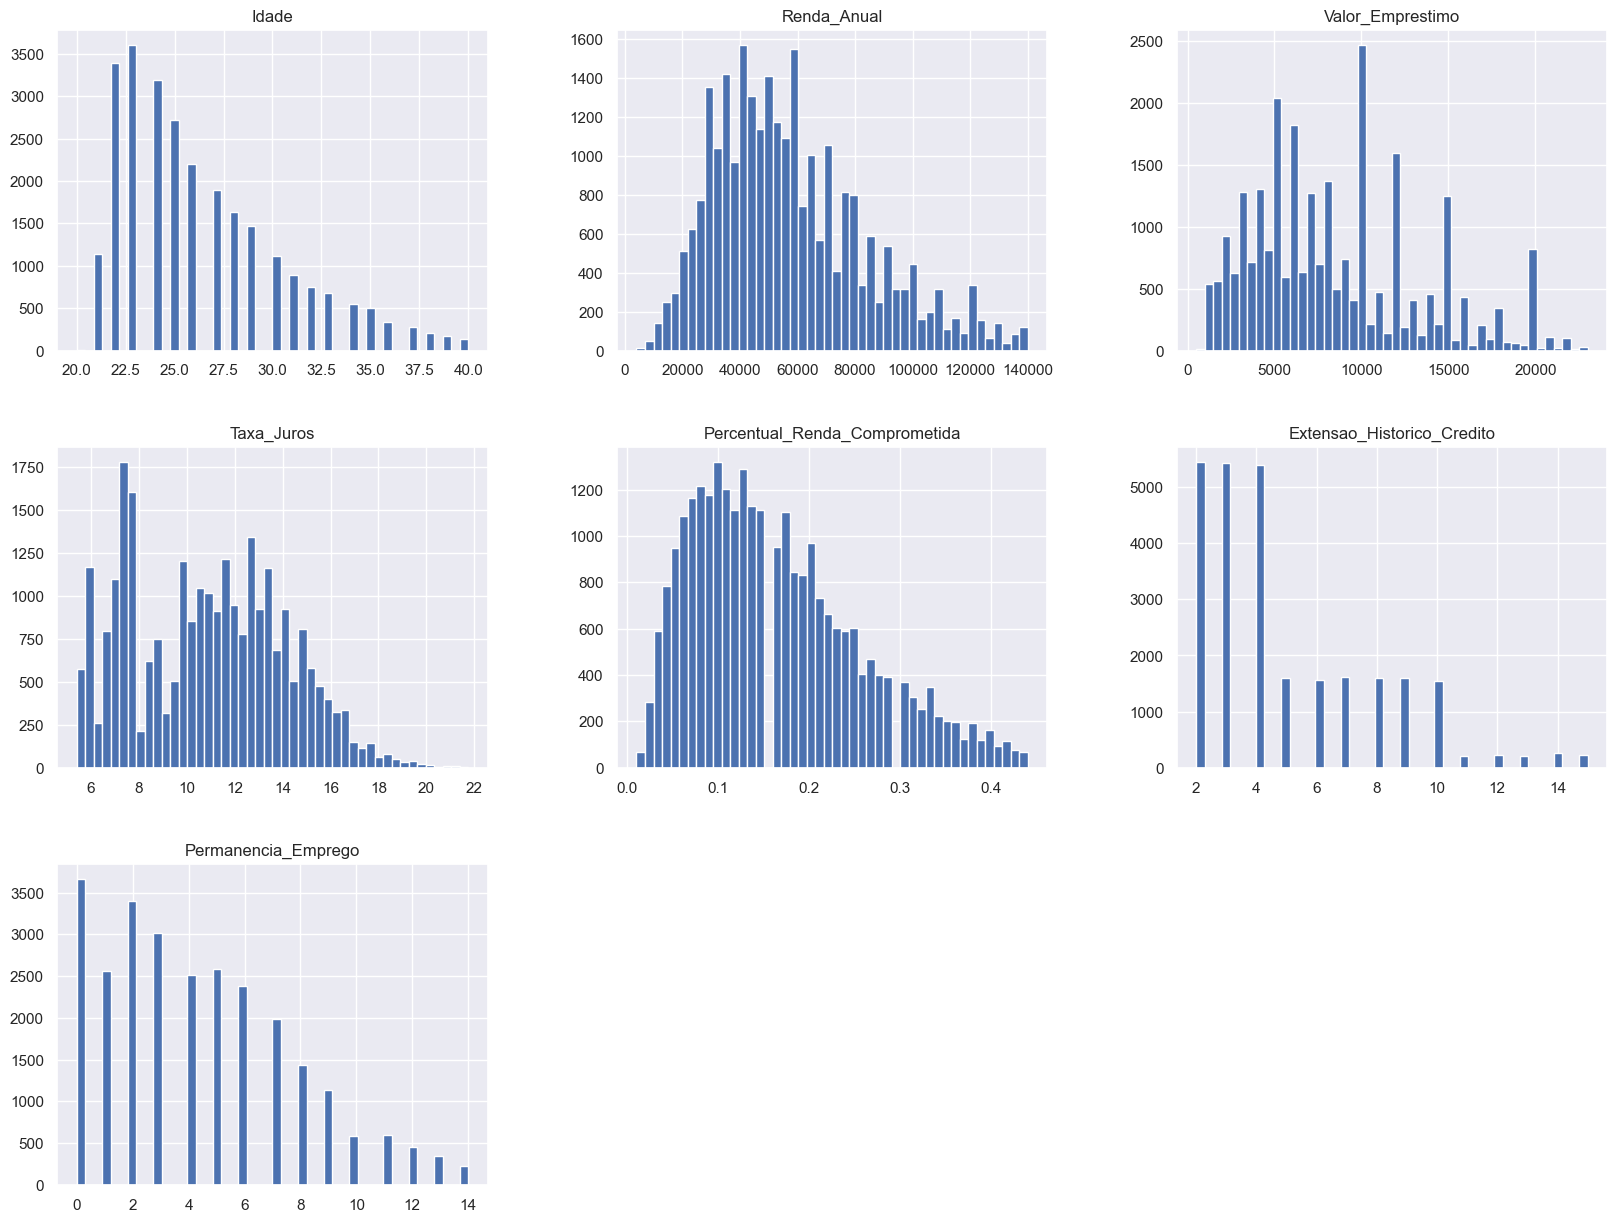

In [11]:
df_geral.hist(figsize=(20, 15), bins=46) # Elabora histogramas para todas as variáveis numéricas.
plt.show() 

Idade: nota-se que os requerentes são indivíduos entre 20 e 40 anos, presentes, com maior frequência, na faixa etária de 21 a 25 anos. 

Renda: a renda anual destas pessoas varia significativamente e concentra-se entre 30.000 e 60.000 reais. 

Permanência no Emprego: o período de permanência mais frequentemente observado entre os requerentes é de 0, 2 e 3 anos. 

Valor do Empréstimo: os valores de crédito mais vezes concedidos são de, aproximadamente, 5.000, 6.000 e 10.000 reais. 

Taxa de Juros: as taxas aplicadas aos empréstimos com maior frequência são de 7,7% e 7,8%.

Percentual de Renda Comprometida: destacando-se sobre os outros percentuais, os que mais se aplicam à renda dos requerentes são os percentuais entre 0,8% e 1,3%.

Extensão do Histórico de Crédito: a extensão de registro de crédito mais comum é de 2, 3 e 4 anos. 

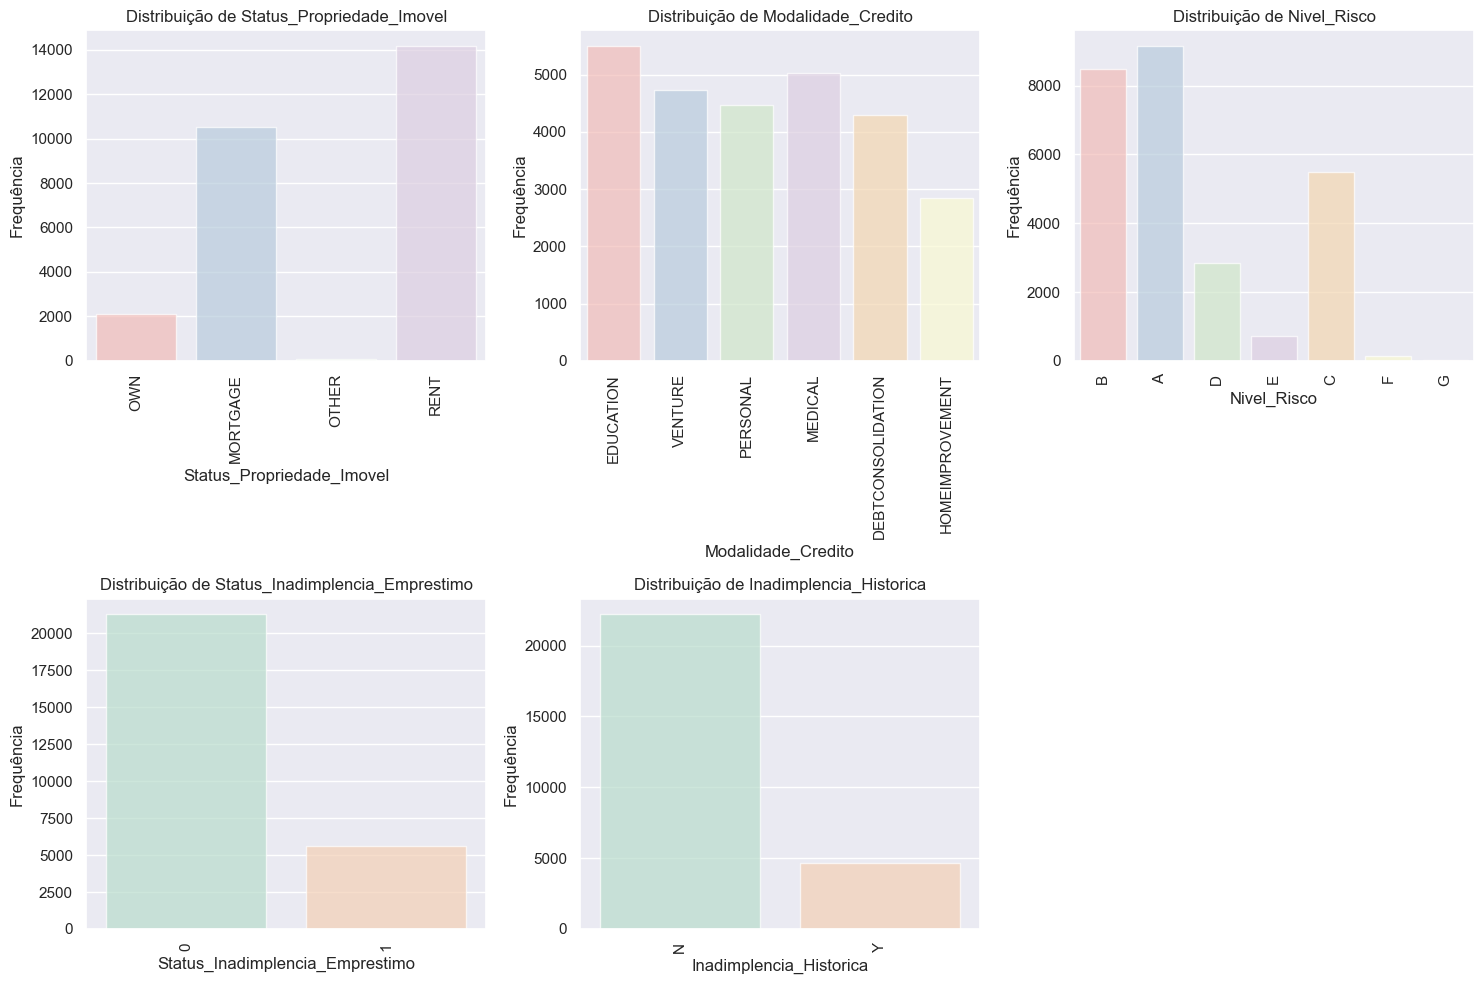

In [12]:
# Cria a figura com 2 linhas e 3 colunas.
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Lista as colunas categóricas para os primeiros gráficos.
categorical_columns = [
    "Status_Propriedade_Imovel", 
    "Modalidade_Credito", 
    "Nivel_Risco", 
    "Status_Inadimplencia_Emprestimo", 
    "Inadimplencia_Historica"
]

# Plota os 3 primeiros gráficos na primeira linha.
for i in range(3):
    sns.countplot(x=df_geral[categorical_columns[i]], ax=axes[0, i], hue=df_geral[categorical_columns[i]], 
                  palette="Pastel1", alpha=0.7, legend=False)
    axes[0, i].set_title(f'Distribuição de {categorical_columns[i]}')
    axes[0, i].set_ylabel('Frequência')
    axes[0, i].tick_params(axis='x', rotation=90)

# Plota os 2 últimos gráficos na segunda linha.
for i in range(2):
    sns.countplot(x=df_geral[categorical_columns[i + 3]], ax=axes[1, i], hue=df_geral[categorical_columns[i + 3]], 
                  palette="Pastel2", alpha=0.7, legend=False)
    axes[1, i].set_title(f'Distribuição de {categorical_columns[i + 3]}')
    axes[1, i].set_ylabel('Frequência')
    axes[1, i].tick_params(axis='x', rotation=90)

# Remove o eixo extra da segunda linha (última coluna).
fig.delaxes(axes[1, 2])

# Ajusta o layout para evitar sobreposição.
plt.tight_layout()
plt.show()

Status de Propriedade do Imóvel: em ordem decrescente, a condição de moradia mais frequente é a de imóveis alugados, seguida dos imóveis hipotecados, dos próprio e dos sob outras condições.

Modalidade de Crédito: do mais solicitado para o menos, foram requeridos os empréstimos estudantis, os destinos à saúde, venture, pessoal, consolidação de dívidas e os de reforma.

Nível de Risco: considerando que os níveis de risco vão de A a G, começando pelo de menor risco até o de maior, observa-se que a frequência de concessão segue, em ordem decrescente, o mesmo sentido (A > G).

Status de Inadimplência: entre os indivíduos contemplados, a maioria é adimplente. Em comparação, o número de adimplentes é mais que o dobro dos inadimplentes. 

Inadimplência Histórica: está variável segue o mesmo padrão da anterior. O número de não inadimplentes é mais que o dobro dos que são. 

# Análises Bivariadas

## Definição de Correlações - Heatmap (Variáveis Numéricas)

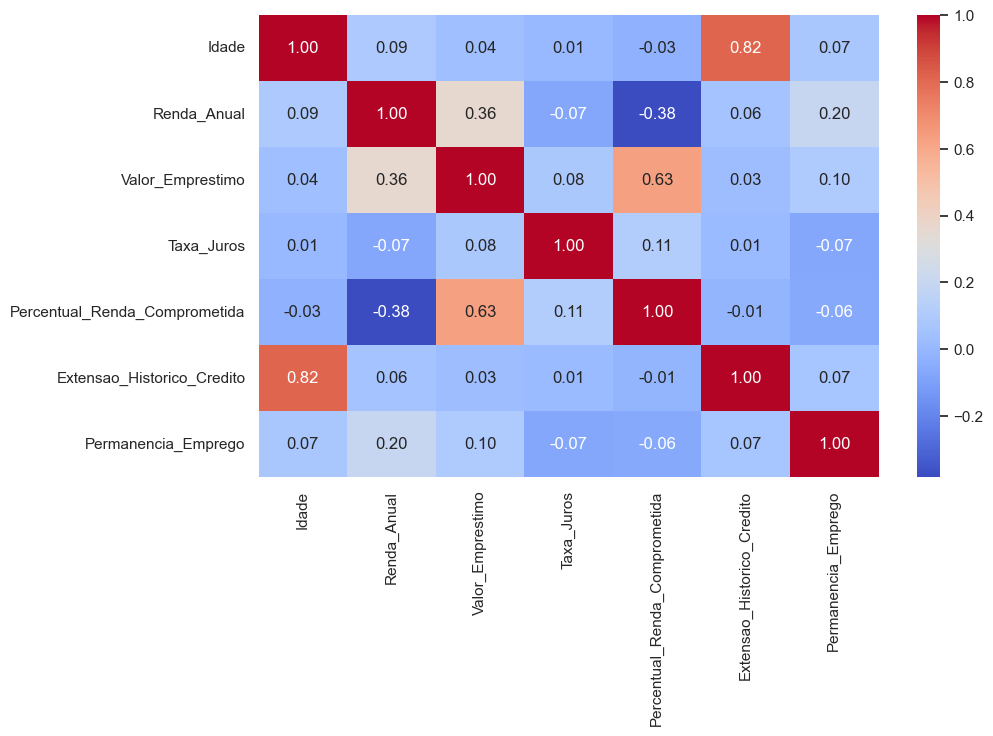

In [13]:
# Cria o heatmap diretamente.
sns.set(rc={'figure.figsize': (10, 6)}) # Define o tamanho da figura.
sns.heatmap(df_geral.select_dtypes(include=['number']).corr(), 
            annot=True, 
            cmap="coolwarm", 
            fmt=".2f")

# Exibe o gráfico.
plt.show()

A partir da plotagem do mapa de calor acima, é possível concluir que há uma forte correlação positiva entre as variáveis 'Duração do Histórico de Crédito' e 'Idade', de forma que, quanto maior for uma, maior será a outra e vice-versa. Além desta, outra correlação positiva, neste caso, moderada, é a estabelecida entre a variável 'Percentual de Renda Comprometida' e 'Valor do Empréstimo', de forma que, mutuamente, quanto maior o valor emprestado, maior será o percentual comprometido.

## Boxplots (Variáveis Categóricas X Variáveis Numéricas)

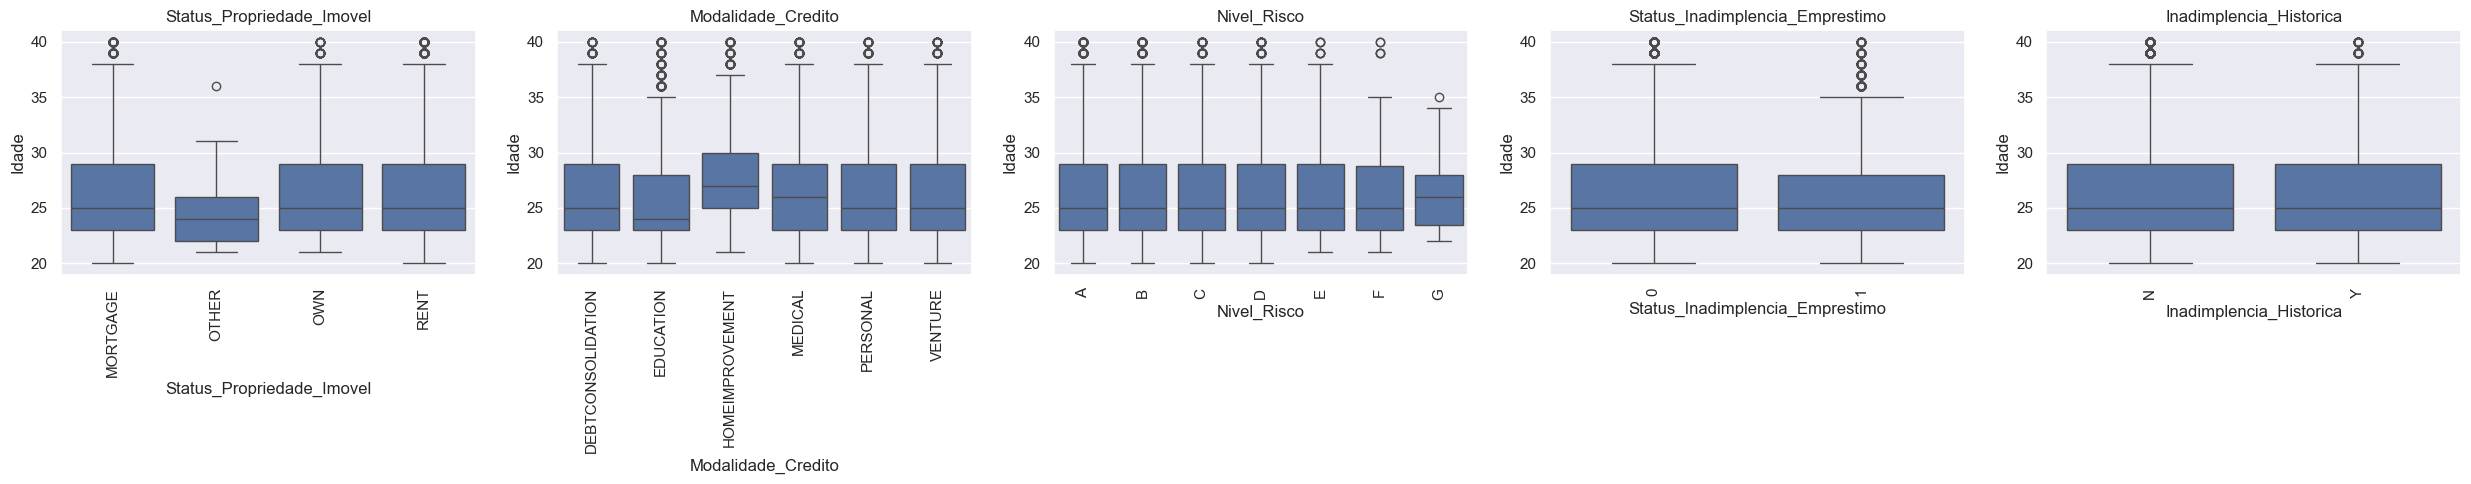

In [14]:
# Seleciona as colunas categóricas.
colunas_categoricas = df_geral.select_dtypes(include="object").columns

# Cria a grade de subplots com uma linha e N colunas.
fig, axes = plt.subplots(nrows=1, ncols=len(colunas_categoricas), figsize=(5 * len(colunas_categoricas), 5))

# Itera sobre cada coluna categórica e plota o gráfico correspondente.
for ax, col in zip(axes, colunas_categoricas):
    categorias_ordenadas = sorted(df_geral[col].dropna().unique()) # Ordena os valores do eixo X.
    sns.boxplot(x=col, y="Idade", data=df_geral, ax=ax, order=categorias_ordenadas) # Aplica a ordem correta.
    ax.tick_params(axis="x", rotation=90) # Corrige a rotação dos rótulos do eixo x.
    ax.set_title(col)

plt.tight_layout() # Ajusta o espaçamento entre os gráficos.
plt.show()

Status de Propriedade do Imóvel: no que tange a distribuição de idades, pode-se afirmar que é basicamente a mesma em relação aos diferentes status (Q1 = ~ 23 anos, Q2 = ~ 25 anos e Q3 = ~ 29 anos), com exceção da categoria 'Other', em que a distribuição é restrita a um intervalo mais limitado de idades. Além disso, a categoria conta, também, com valores de quartis mais baixos (Q1 = ~ 22 anos, Q2 = ~ 24 anos e Q3 = ~ 26 anos). Essas características apontam, portanto, para um público mais jovem. Isso pode ser explicado pela falta de independência financeira dos requerentes mais jovens que podem, por exemplo, ainda viver com os pais. 

Modalidade de Crédito: quanto a esta variável, as amplitudes de idade são, praticamente, as mesmas nas categorias de 'Debtconsolidation', 'Personal' e 'Venture' (Q1 = ~ 23 anos, Q2 = 25 anos e Q3 = ~ 28 anos). 
A categoria 'Medical' também apresenta uma distribuição bastante semelhante às já mencionadas, mas conta com uma mediana ligeiramente deslocada em um ano (~ 26 anos), o que não impacta significativamente na distribuição da categoria em comparação às outras.
Quando a categoria 'Education', o intervalo de valores apresenta uma amplitude menor e o Q2 e Q3 deslocados para baixo (~ 23 e ~ 27,5 anos), o que é bastante factível, uma vez que pessoas mais jovens é que costumam estar em fase de formação universitária. 
Já, no caso dos créditos destinados à reforma de imóveis ('Homeimprovement'), apesar de sua amplitude ser semelhante a de 'Education', observa-se um deslocamento superior do intervalo interquartil significativo, indicando o aumento na idade máxima para 75% dos solicitantes deste tipo de empréstimo, o que também faz sentido, devido à tendência de que reformas sejam feitas em imóveis próprios, conquista mais comumente observada em indivíduos mais velhos.

Nível de Risco: os intervalos de idade e interquartis são basicamente os mesmos para os níveis de risco de A a D (~ 20 anos - ~ 37,5 anos), apresentando alteração apenas para os três níveis de risco mais altos, E, F e G. 
Para o nível E, ocorre o encurtamento do limite inferior do intervalo (~ 21 anos) indicando que a idade mínima de quem solicitou empréstimos nível E é um ano maior em comparação aos níveis já mencionados. 
Quanto ao nível F, o encurtamento ocorre também para o limite superior, e em maior grau, o que define um perfil mais jovem para empréstimos deste tipo (~ 21 anos - ~ 35 anos). 
Por fim, para o nível mais alto de risco, G, o intervalo de idades é encurtado ainda mais, tanto no Q1, quanto no Q3, compreendendo, portanto, um público mais limitado, que já não é tão jovem quanto para os demais níveis (~ 24 anos), mas que não atinge mais do que 34 anos, além de ter a mediana deslocada para cima (~ 26 anos). 
Uma possível explicação para as características apresentadas, a partir do nível E, é de que estão sendo concedidos créditos sob condições de pagamento mais complexas, como juros e valores altos, a pessoas que provavelmente não possuem, em decorrência da idade, um patrimônio tão sólido e que tem maior probabilidade de deixar de realizar os pagamentos.

Status de Inadimplência: em comparação aos adimplentes, o intervalo de idade dos inadimplentes tem os limite superior e terceiro quartil deslocados para idades mais baixas, o que aponta para um público mais jovem no que diz respeito à falta de pagamentos. 

Inadimplência Histórica: não há diferença significativa entre os intervalos de idade do público que, em algum momento, já foi inadimplente e que não foi. 

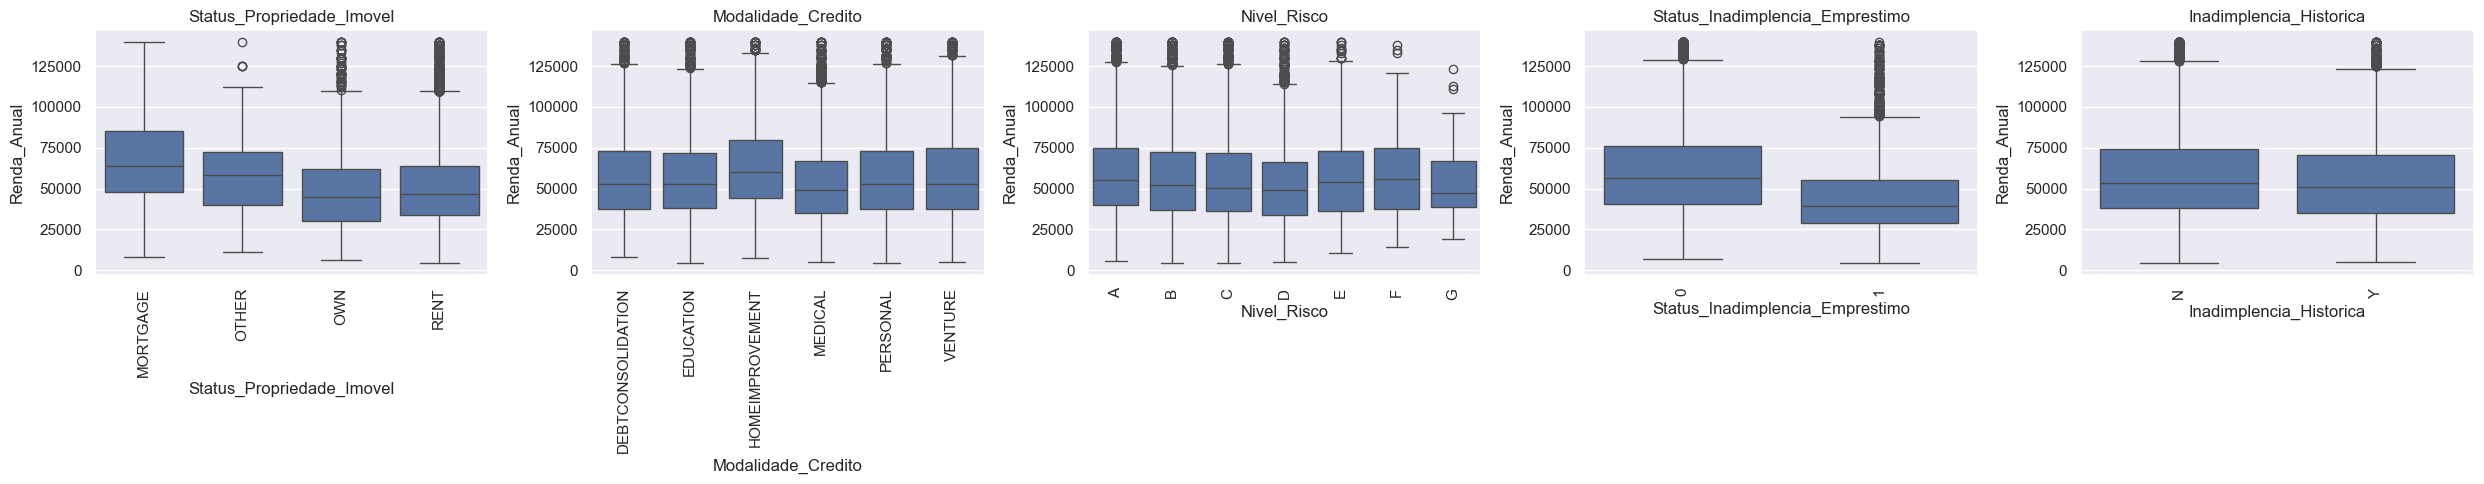

In [15]:
# Seleciona as colunas categóricas.
colunas_categoricas = df_geral.select_dtypes(include="object").columns

# Cria a grade de subplots com uma linha e N colunas.
fig, axes = plt.subplots(nrows=1, ncols=len(colunas_categoricas), figsize=(5 * len(colunas_categoricas), 5))

# Itera sobre cada coluna categórica e plota o gráfico correspondente.
for ax, col in zip(axes, colunas_categoricas):
    categorias_ordenadas = sorted(df_geral[col].dropna().unique()) # Ordena os valores do eixo X.
    sns.boxplot(x=col, y="Renda_Anual", data=df_geral, ax=ax, order=categorias_ordenadas) # Aplica a ordem correta.
    ax.tick_params(axis="x", rotation=90) # Corrige a rotação dos rótulos do eixo x.
    ax.set_title(col)

plt.tight_layout() # Ajusta o espaçamento entre os gráficos.
plt.show()

Status de Propriedade do Imóvel: os valores de renda para indivíduos com imóveis na categoria 'Mortgage' são os que apresentam maior abrangência, podendo assumir, praticamente, quase todos os valores do gráfico e, além disso, seu intervalo interquartil conta com os maiores valores (entre ~ 50.000 reais e ~ 80.000 reais). Em seguida, a categoria 'Other', que caracteriza-se por um intervalo menos abrangente de renda, apresenta um intervalo inter-quartil cujos valores são os segundo maiores, entre ~ 40.000 reais e ~ 70.000 reais. 

Os intervalos gerais das categorias 'Own' e 'Rent' são bastante semelhantes entre si e assumem o mesmo intervalo de valores, havendo, porém, uma pequena particularidade: o intervalo inter-quartil de 'Own' apresenta-se entre valores mais baixos do que o de 'Rent', apontando para um perfil de requerente com renda mais baixa. 

Modalidade de Crédito: as categorias de empréstimo 'Debtconsolidation', 'Education', 'Personal' e 'Venture' apresentam grande similaridade entre si e possuem, basicamente, os mesmo intervalos inter-quartis de renda (~ 40.000 reais - ~ 75.000 reais). As diferenças mais importantes, por outro lado, concentram-se nas categorias 'Homeimprovement', cujo intervalo interquartil abarca valores mais altos, indicando um perfil de solicitante com maior renda; e 'Medical', cujo intervalo conta com valores mais baixos, indicando, assim, requerentes com rendas menores. Um possível entendimento deste resultado é de que reformas, salvo algumas exceções, não costumam ser realizadas em imóveis não próprios, o que indicaria que aqueles que contraem uma dívida com esse propósito tem condições que permitiram adquirir este bem e, por isso, contam com rendas maiores. Quanto ao observado para a categoria 'Medical', é possível que este perfil de solicitante justifique-se pelo seu menor acesso a planos de saúde e outros recursos pagos, o que força o requerimento de crédito para sanar emergências médicas. 

Nível de Risco: do nível de risco A até o D, os valores de renda abrangidos pelo intervalo interquartil diminuem. A partir do nível E, observa-se aumento nestes valores, seguido de aumento, também, para o nível F. Enfim, quanto ao G, o mais arriscado, a renda cai novamente. 

Status de Inadimplência: entre os inadimplentes a renda média é, aproximadamente, 20.000 mil reais mais baixa que para os não inadimplentes. Essa observação pode ser explicada a partir de dois pontos de vista: de um lado, a má educação financeira dos requerentes que contraem dívidas maiores do que podem pagar, e de outro, a falha na política de crédito da instituição financeiras por conceder um valor de crédito acima do que o perfil deste cliente comporta. 

Inadimplência Histórica: nesta variável nota-se uma distribuição de renda semelhante à da variável anterior, porém, talvez, por tratar-se de todo o histórico dos indivíduos, a diferença entre os que, alguma vez, foram inadimplentes e os que nunca foram é menor. 

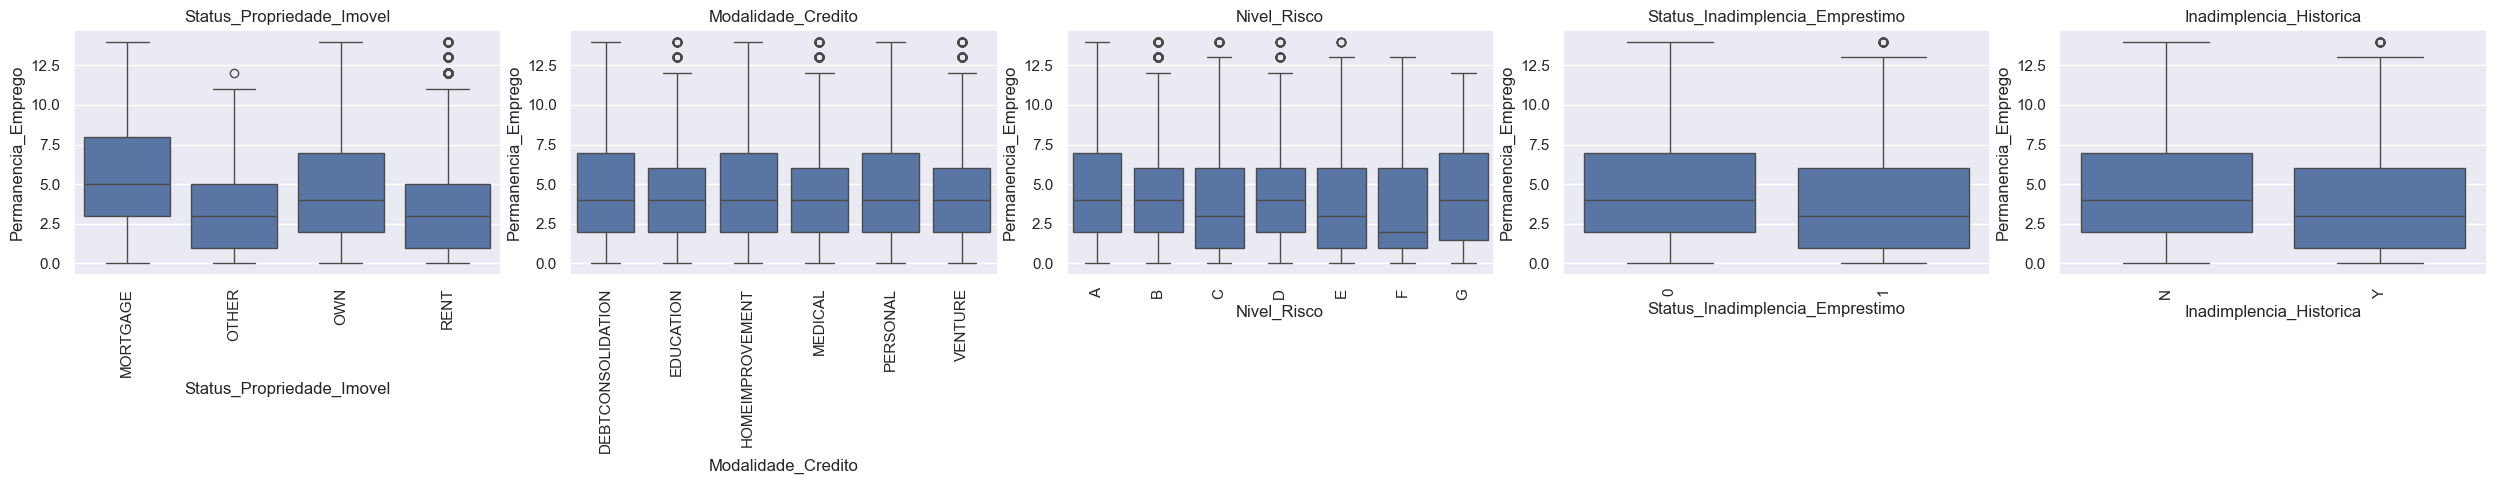

In [16]:
# Seleciona as colunas categóricas.
colunas_categoricas = df_geral.select_dtypes(include="object").columns

# Cria a grade de subplots com uma linha e N colunas.
fig, axes = plt.subplots(nrows=1, ncols=len(colunas_categoricas), figsize=(5 * len(colunas_categoricas), 5))

# Itera sobre cada coluna categórica e plota o gráfico correspondente.
for ax, col in zip(axes, colunas_categoricas):
    categorias_ordenadas = sorted(df_geral[col].dropna().unique()) # Ordena os valores do eixo X.
    sns.boxplot(x=col, y="Permanencia_Emprego", data=df_geral, ax=ax, order=categorias_ordenadas) # Aplica a ordem correta.
    ax.tick_params(axis="x", rotation=90) # Corrige a rotação dos rótulos do eixo x.
    ax.set_title(col)

plt.tight_layout() # Ajusta o espaçamento entre os gráficos.
plt.show()

Status de Propriedade do Imóvel: considerando a mediana e o terceiro quartil para cada uma das categorias, observa-se que o seu valor máximo encontra-se em 'Mortgage', passando por 'Own' e atinge os menores períodos nas categorias 'Rent' e 'Other'. Essa observação pode ser explicada pelo fato de que, para arcar com a hipoteca, é preciso contar com uma renda regular, ao mesmo tempo em que a estabilidade em um trabalho, mantendo-se empregado por longos períodos, permitirá quitar o imóvel. Logo, requerentes com casas hipotecadas e próprias tendem a ser pessoas que permanecem mais tempo em seus empregos. 

Modalidade de Crédito: as categorias 'Debtconsolidation', 'Homeimprovement' e 'Personal' têm, entre si, a mesma distribuição de dados e formam um grupo que se caracteriza por englobar períodos maiores de ocupação (~ 2 anos a ~ 7 anos). Definindo um segundo grupo, as categorias 'Education', 'Medical' e 'Venture', apresentam terceiros quartis mais baixos, o que revela períodos de ocupação menores para 75% do público. 

Nível de Risco: este gráfico caracteriza-se por apresentar perfis de distribuição bastante variados, a começar pelos requerentes de crédito do tipo A que são os que possuem a maior variedade de períodos de permanência, com maior concentração entre 2,5 e 7 anos. Os níveis B e D contam, por sua vez, contam com uma distribuição mais limitada e um intervalo inter-quartil menor, entre 2,5 e 6 anos. Já os níveis C, D e F, possuem os mesmos limites superior e inferior, diferenciando-se apenas quanto a posição do Q2, que é o mesmo para D e E (3 anos), mas assume um valor bem menor (2 anos) para nível F, o que aponta para indivíduos com um perfil de permanência inferior. Por fim, com limites superior e inferior muito semelhantes aos dos níveis B e D, observa-se a distribuição de G, que diferencia-se por ter um intervalo inter-quartil mais amplo (1,25 - 7,4 anos). 

Status de Inadimplência: os requerentes inadimplentes têm períodos de ocupação menores, o que pode explicar a dificuldade que possuem em manter os pagamentos. Assim como, seguindo a mesma lógica, os não inadimplentes contam com períodos mais longos de permanência. 

Inadimplência Histórica: assim como a variável anterior, esta também apresenta relação positiva direta entre períodos curtos de permanência no trabalho e presença de inadimplência no registro histórico. Ao contrário, períodos mais longos estão mais relacionados a requerentes não nunca foram inadimplentes. 

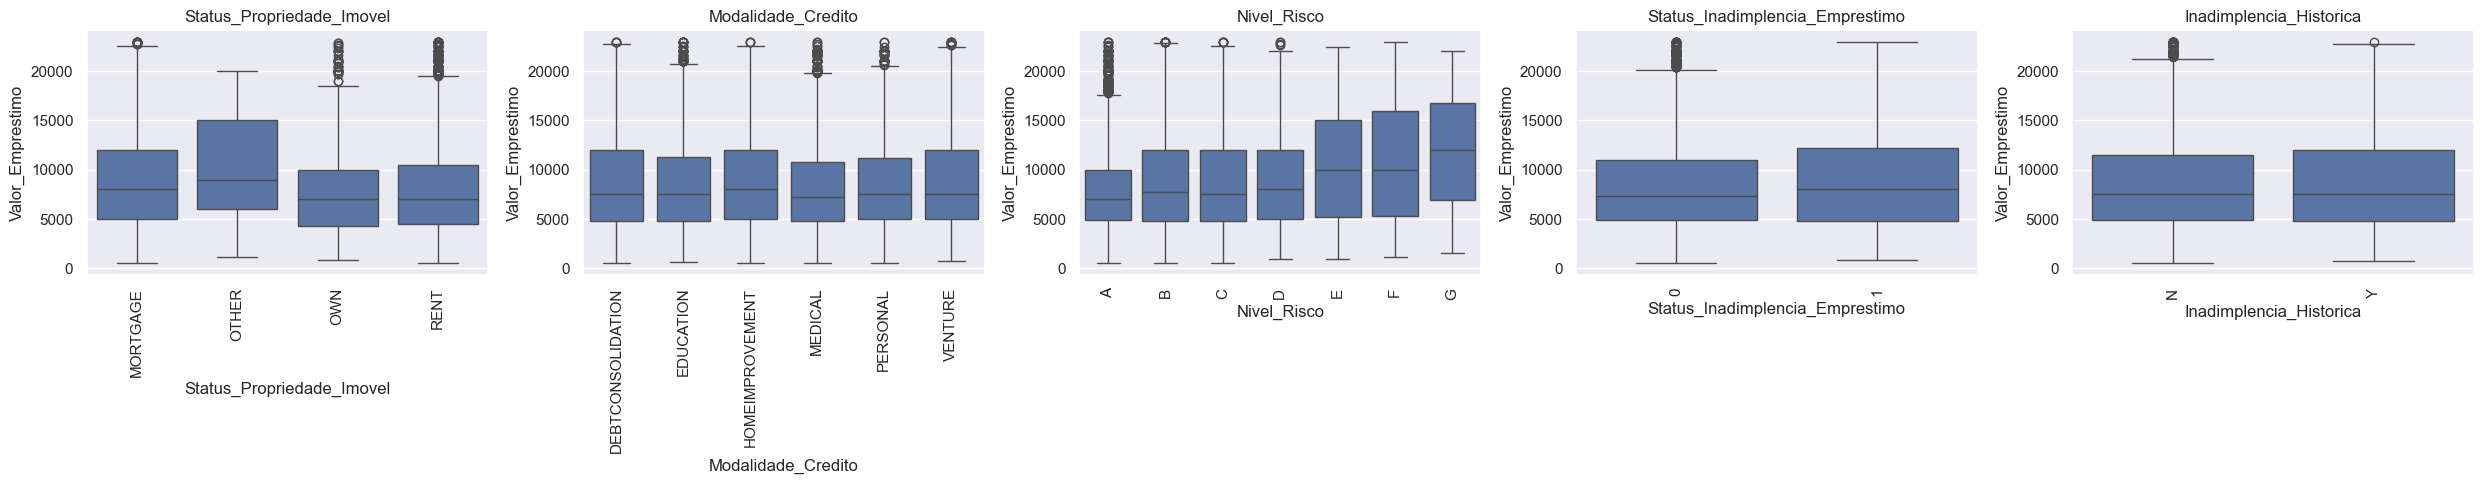

In [17]:
# Seleciona as colunas categóricas
colunas_categoricas = df_geral.select_dtypes(include="object").columns

# Cria a grade de subplots com uma linha e N colunas
fig, axes = plt.subplots(nrows=1, ncols=len(colunas_categoricas), figsize=(5 * len(colunas_categoricas), 5))

# Itera sobre cada coluna categórica e plota o gráfico correspondente
for ax, col in zip(axes, colunas_categoricas):
    categorias_ordenadas = sorted(df_geral[col].dropna().unique()) # Ordena os valores do eixo X
    sns.boxplot(x=col, y="Valor_Emprestimo", data=df_geral, ax=ax, order=categorias_ordenadas) # Aplica a ordem correta
    ax.tick_params(axis="x", rotation=90) # Corrige a rotação dos rótulos do eixo x
    ax.set_title(col)

plt.tight_layout() # Ajusta o espaçamento entre os gráficos
plt.show()

Status de Propriedade do Imóvel: a única categoria a ter o terceiro quartil acima de ~ 12.000 reais é 'Other', o que define que a maioria (75%) dos empréstimos concedidos a este público podem atingir um valor máximo superior aos das outras classes. Em uma posição secundária, também considerando o terceiro quartil, observa-se 'Mortgage' como a classe cujo perfil de valor dos empréstimos é o segundo maior. Por fim, nota-se as categorias 'Own' e 'Rent' com os perfis de valores mais baixos. 

Modalidade de Crédito: as categorias desta variável podem ser divididas em dois grupos de acordo com suas similaridades. O primeiro inclui empréstimos do tipo 'Debtconsolidation', 'Homeimprovement' e 'Venture', caracterizados por terem os maiores valores de terceiro quartil, indicando que 75% dos solicitantes requereram créditos de até ~ 12.000 reais. O segundo grupo, formado por créditos do tipo 'Education', 'Medical' e 'Personal' são definidos por terceiros quartis de, no máximo, ~ 11.000 reais.

Nível de Risco: o valor solicitado ao banco por 75% dos indivíduos aumenta no mesmo sentido que o nível de risco do crédito, sendo A o de menor risco e o G de maior. 

Status de Inadimplência: a distribuição, tanto para a categoria de inadimplentes, quanto para adimplentes, possui muita similaridade. No entanto, quando observado o terceiro quartil, o valor máximo solicitado foi maior na classe de inadimplentes.

Inadimplência Histórica: segue as mesmas considerações feitas na variável anterior.

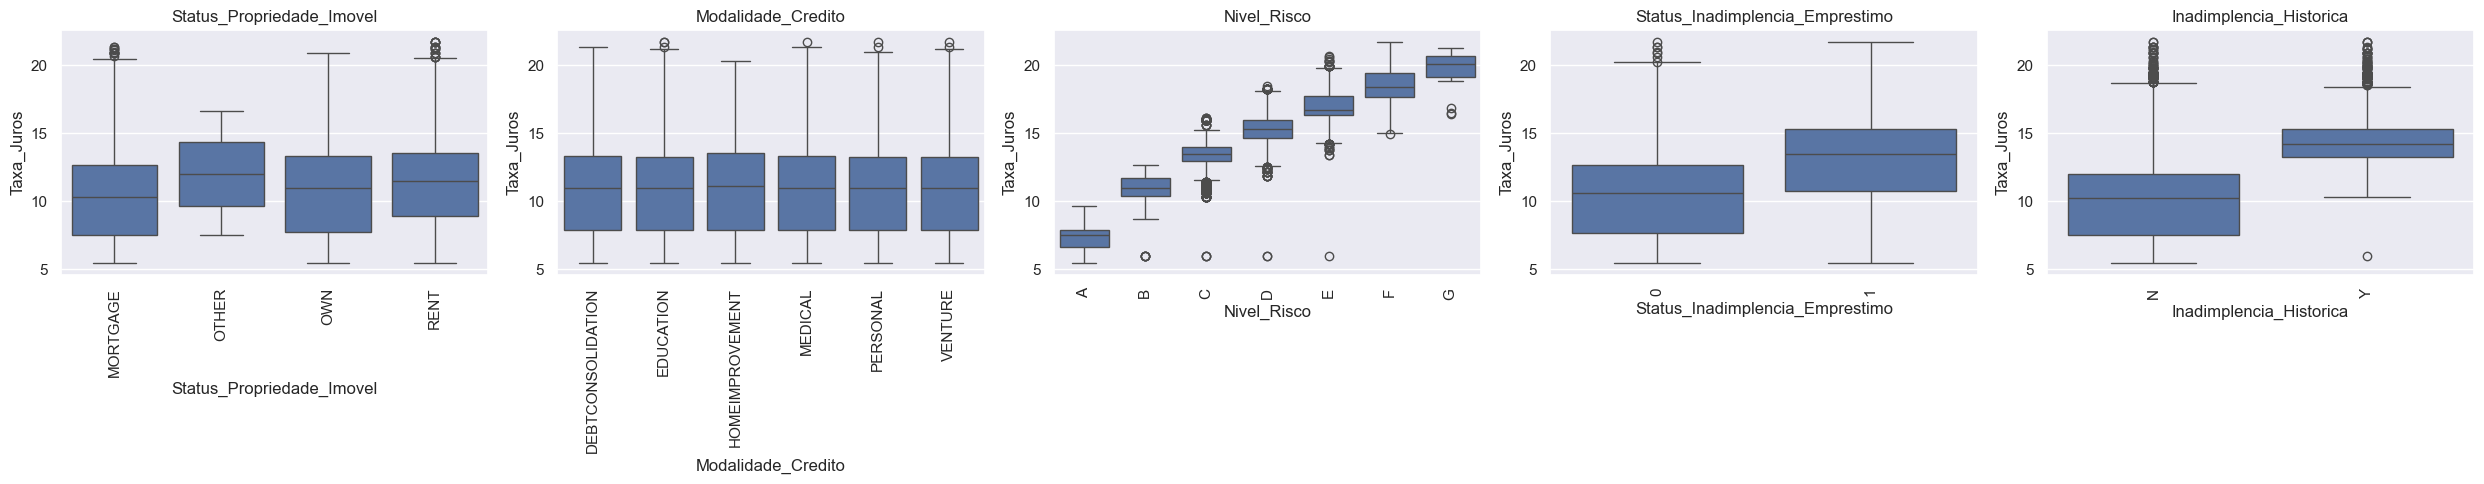

In [18]:
# Seleciona as colunas categóricas.
colunas_categoricas = df_geral.select_dtypes(include="object").columns

# Cria a grade de subplots com uma linha e N colunas.
fig, axes = plt.subplots(nrows=1, ncols=len(colunas_categoricas), figsize=(5 * len(colunas_categoricas), 5))

# Itera sobre cada coluna categórica e plota o gráfico correspondente.
for ax, col in zip(axes, colunas_categoricas):
    categorias_ordenadas = sorted(df_geral[col].dropna().unique()) # Ordena os valores do eixo X.
    sns.boxplot(x=col, y="Taxa_Juros", data=df_geral, ax=ax, order=categorias_ordenadas) # Aplica a ordem correta.
    ax.tick_params(axis="x", rotation=90) # Corrige a rotação dos rótulos do eixo x.
    ax.set_title(col)

plt.tight_layout() # Ajusta o espaçamento entre os gráficos.
plt.show()

Status de Propriedade do Imóvel: dentre os quatro grupos de solicitantes, o que se destaca por ter as maiores alíquotas de juros aplicadas é aquele que pertence ao grupo 'Other', cujo terceiro quartil, que representa 75% dos indivíduos, posiciona-se em 14%. As categorias 'Own' e 'Rent' tem o terceiro quartil em ~ 13%, enquanto os solicitantes da categoria 'Mortgage' o tem em ~ 12,5%.

Modalidade de Crédito: de modo geral, as seis categorias de empréstimo apresentam grande similaridade entre si, podendo ser observada apenas uma leve diferença nas categorias 'Homeimprovement' e 'Medical'. Nestes, a taxa de juros máxima, considerando a maioria dos empréstimos concedidos, é um pouco maior do que para as demais categorias. 

Nível de Risco: em coerência ao que comumente observa-se no mercado, ao passo em que o risco do crédito concedido aumenta, aumenta também o juros aplicado, que, neste caso, cresce do nível A em direção ao G.

Status de Inadimplência: o perfil de taxa de juros cobrada de clientes inadimplentes é consideravelmente superior ao cobrado dos adimplentes: o primeiro público, na maioria dos casos, tem até 15% de juros, enquanto o segundo tem até 12,5%.

Inadimplência Histórica: a diferença entre os dois públicos, para esta variável, segue a mesma lógica da anterior, no entanto, a diferença entre o juros aplicado a adimplentes e inadimplentes é ainda mais significativa. Enquanto o primeiro grupo tem aplicado, em sua maioria, juros de até ~ 12% sobre o crédito, o segundo tem até ~ 17%.

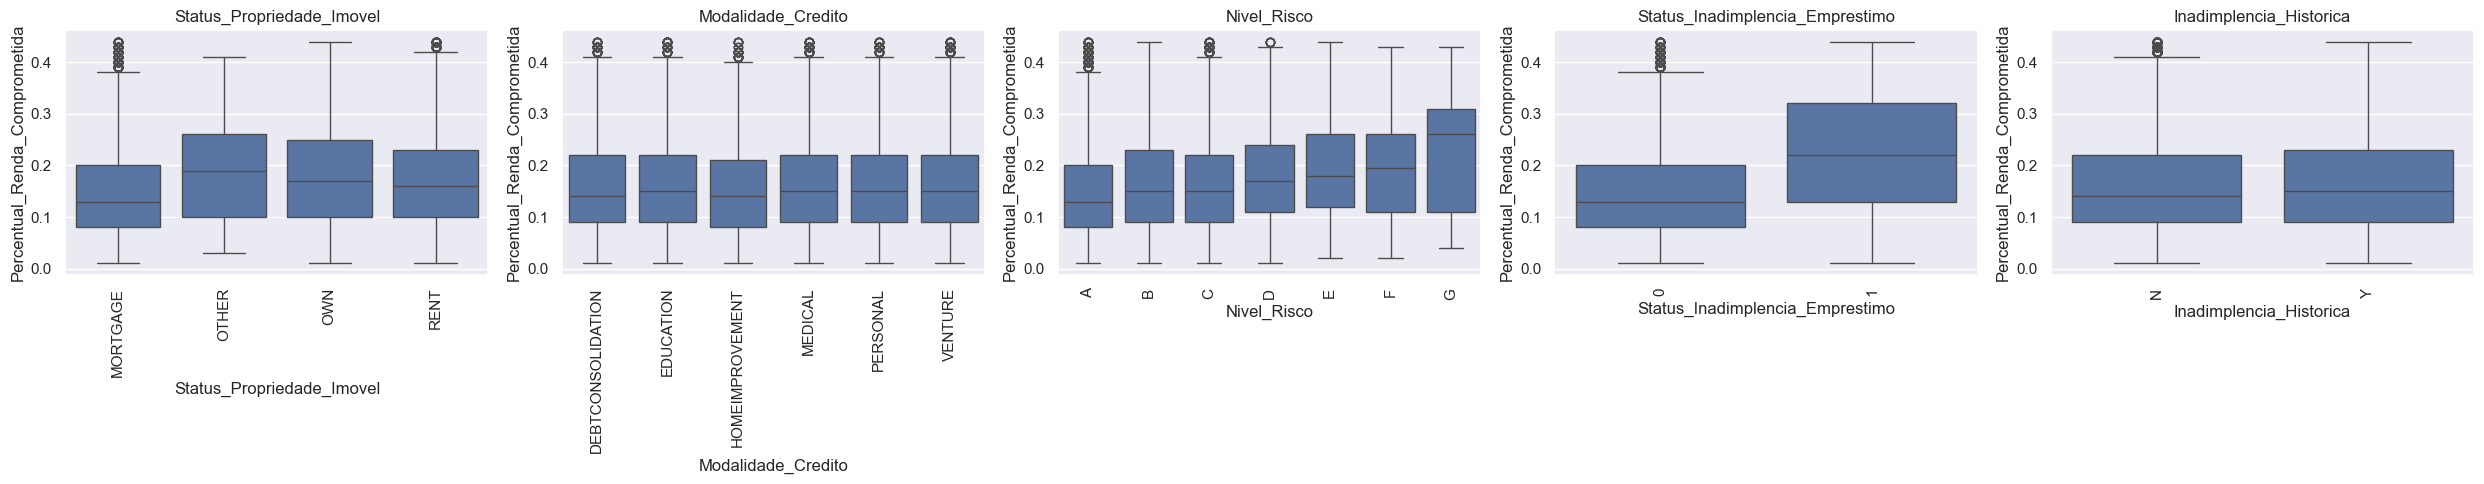

In [19]:
# Seleciona as colunas categóricas.
colunas_categoricas = df_geral.select_dtypes(include="object").columns

# Cria a grade de subplots com uma linha e N colunas.
fig, axes = plt.subplots(nrows=1, ncols=len(colunas_categoricas), figsize=(5 * len(colunas_categoricas), 5))

# Itera sobre cada coluna categórica e plota o gráfico correspondente.
for ax, col in zip(axes, colunas_categoricas):
    categorias_ordenadas = sorted(df_geral[col].dropna().unique()) # Ordena os valores do eixo X.
    sns.boxplot(x=col, y="Percentual_Renda_Comprometida", data=df_geral, ax=ax, order=categorias_ordenadas) # Aplica a ordem correta.
    ax.tick_params(axis="x", rotation=90) # Corrige a rotação dos rótulos do eixo x.
    ax.set_title(col)

plt.tight_layout() # Ajusta o espaçamento entre os gráficos.
plt.show()

Status de Propriedade do Imóvel: o percentual máximo de renda comprometida, considerando a maioria dos empréstimos concedidos (75%), é o maior para a categoria 'Other', seguido da categoria 'Own', com o segundo percentual máximo. Na terceira posição observa-se a categoria 'Rent' e, por último, 'Mortgage'.

Modalidade de Crédito: a distribuição das taxas de juros é bastante homogênea entre as classes de empréstimo (Q3 = ~ 0,21), notando-se apenas uma pequena diferença em 'Homeimprovement' que demonstra o terceiro quartil um pouco menor do que os demais (Q3 = ~ 1,9).

Nível de Risco: do maior para menor percentual de renda, considerando o Q3, a ordem dos níveis de risco é: A, C, B, D, E/F e G. O que, em termos gerais, faz sentido, dado que, quanto maior o grau de risco, maior o juros aplicado e, consequentemente, maior o valor a ser pago.

Status de Inadimplência: entre o público adimplente, o percentual de renda comprometido é bastante inferior ao do público inadimplente e isso pode ser explicado pela relação positiva entre o percentual e a dificuldade em arcar com uma despesa mais comprometedora. 

Inadimplência Histórica: em comparação, quando observado o histórico geral de cada requerente, é bastante semelhante ao perfil de distribuição para ambas as categorias, sendo possível observar, entretanto, uma pequena elevação do Q3 para quem já foi, em algum momento, inadimplente. 

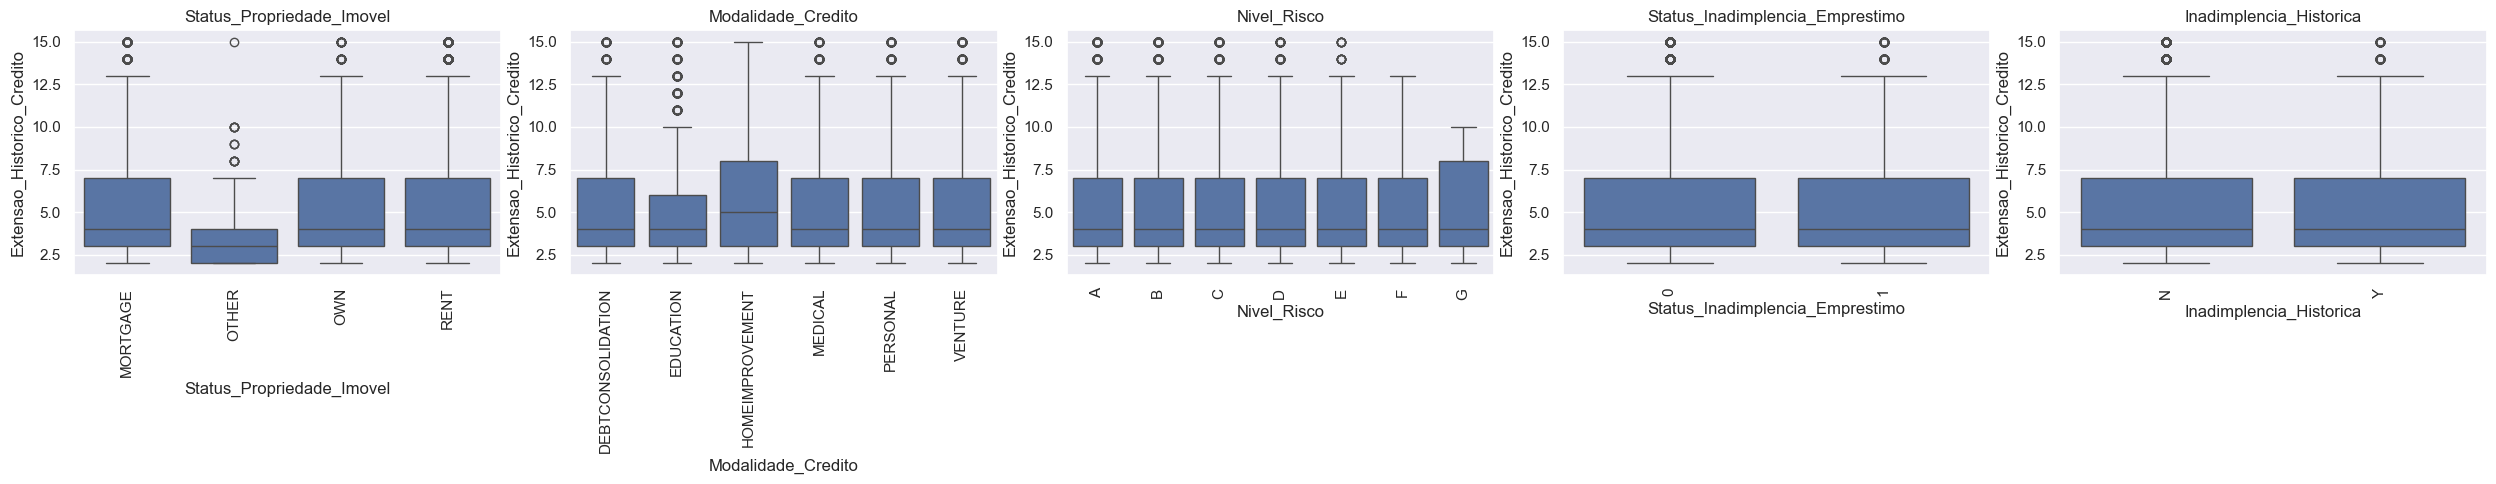

In [20]:
# Seleciona as colunas categóricas.
colunas_categoricas = df_geral.select_dtypes(include="object").columns

# Cria a grade de subplots com uma linha e N colunas.
fig, axes = plt.subplots(nrows=1, ncols=len(colunas_categoricas), figsize=(5 * len(colunas_categoricas), 5))

# Itera sobre cada coluna categórica e plota o gráfico correspondente.
for ax, col in zip(axes, colunas_categoricas):
    categorias_ordenadas = sorted(df_geral[col].dropna().unique()) # Ordena os valores do eixo X.
    sns.boxplot(x=col, y="Extensao_Historico_Credito", data=df_geral, ax=ax, order=categorias_ordenadas) # Aplica a ordem correta.
    ax.tick_params(axis="x", rotation=90) # Corrige a rotação dos rótulos do eixo x.
    ax.set_title(col)

plt.tight_layout() # Ajusta o espaçamento entre os gráficos.
plt.show()

Status de Propriedade do Imóvel: considerando as categorias 'Mortgage', 'Own' e 'Rent' a distribuição da variável é basicamente a mesma, sendo 'Other' a única a destoar das demais e apresentar o limite superior do intervalo (~ 6,4 anos) muito abaixo dos outros (~ 13 anos). É possível que isso ocorra, pois os outros públicos são compostos por indivíduos mais velhos que já precisaram usar serviços bancários de transferência, recebimento e reserva de dinheiro, enquanto o público 'Other', composto por pessoas mais jovens, pode não ter tido essa necessidade há tanto tempo.

Modalidade de Crédito: entre os tipos de empréstimo solicitado, os que mais se diferenciam são os do tipo 'Education' e 'Homeimprovement'. Partindo do mesmo pressuposto da variável anterior e baseando-se na, já realizada, análise da idade, compreende-se que essa diferença ocorre, provavelmente, porque, quem recebeu crédito estudantil é mais jovem que o restante dos indivíduos e, quem recebeu crédito de reforma, é mais velho. Dessa forma, quem é jovem tende a ter um histórico mais curto do que os com mais idade. 

Nível de Risco: a duração dos históricos, quando observada sob o grau de risco dos empréstimos, distribui-se de forma bastante semelhante. A única distribuição a se diferenciar é a do nível G, o maior, em que o público requerente conta com um perfil de histórico mais longo. É possível que essa variação justifica-se, não por uma relação aleatória, na qual, por acaso, o grupo aderente a este nível e risco apresenta histórico mais longo, mas, sim, por um viés de seleção, assumindo que os clientes com histórico mais longo foram aprovados para o crédito de risco G justamente por esse motivo. 

Status de Inadimplência: avaliados lado a lado, não são observadas diferenças significativas entre a distribuição de valores para adimplentes e inadimplentes. 

Inadimplência Histórica: para esta variável é válida a mesma observação da anterior. 


In [21]:
df_geral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26878 entries, 0 to 26877
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Idade                            26878 non-null  int64  
 1   Renda_Anual                      26878 non-null  int64  
 2   Status_Propriedade_Imovel        26878 non-null  object 
 3   Modalidade_Credito               26878 non-null  object 
 4   Nivel_Risco                      26878 non-null  object 
 5   Valor_Emprestimo                 26878 non-null  int64  
 6   Taxa_Juros                       26878 non-null  float64
 7   Status_Inadimplencia_Emprestimo  26878 non-null  object 
 8   Percentual_Renda_Comprometida    26878 non-null  float64
 9   Inadimplencia_Historica          26878 non-null  object 
 10  Extensao_Historico_Credito       26878 non-null  int64  
 11  Permanencia_Emprego              26878 non-null  float64
dtypes: float64(3), int

In [22]:
df_geral['Status_Inadimplencia_Emprestimo'] = df_geral['Status_Inadimplencia_Emprestimo'].astype('int') # Altera o formato da coluna 'Status_emprestimo' de int64 para object.

## Classificação de Risco

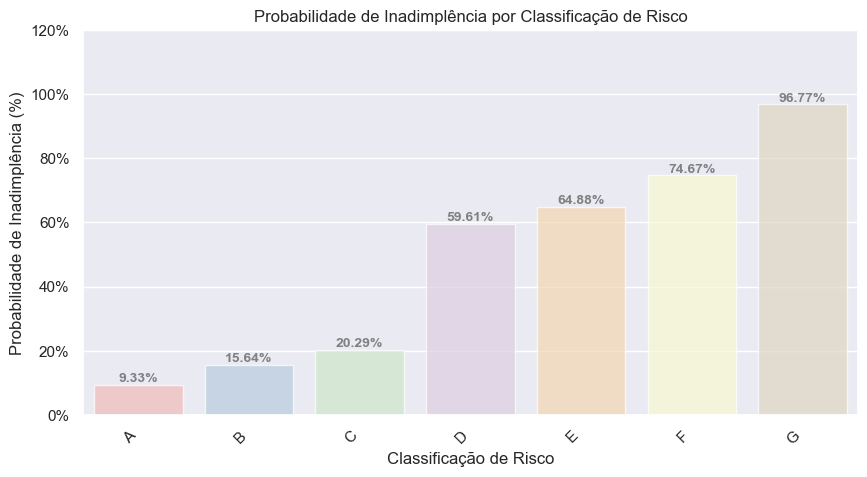

In [23]:
# Calcula a média da probabilidade de inadimplência por nível de risco.
media_status_inad = df_geral.groupby('Nivel_Risco', observed=False)['Status_Inadimplencia_Emprestimo'].mean() * 100
media_status_inad = media_status_inad.reset_index()

# Cria a figura.
plt.figure(figsize=(10, 5))

# Cria o gráfico de barras.
ax = sns.barplot(x='Nivel_Risco', y='Status_Inadimplencia_Emprestimo', data=media_status_inad, hue='Nivel_Risco', palette='Pastel1', alpha=0.7, legend=False)

# Adiciona os valores das médias acima das barras.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='grey')

# Acrescenta os títulos de gráfico e eixos.
ax.set_xlabel('Classificação de Risco')
ax.set_ylabel('Probabilidade de Inadimplência (%)')
ax.set_title('Probabilidade de Inadimplência por Classificação de Risco')

# Formata o eixo Y como porcentagem.
ticks = ax.get_yticks()
y_labels = [f'{int(y)}%' for y in ticks]
ax.set_yticks(ticks)
ax.set_yticklabels(y_labels)

# Ajusta a rotação dos rótulos do eixo X corretamente.
ax.set_xticks(ax.get_xticks()) # Define os ticks antes de modificar os rótulos.
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Exibe o gráfico.
plt.show()

Quando analisada a probabilidade de inadimplência, a partir da classificação de risco, nota-se que quanto maior o risco atribuído ao indivíduo, maior a probabilidade. Essa constatação corrobora com a lógica aplicada à designação de risco, já que um dos principais aspectos avaliados é justamente o quão suscetível à inadimplência a instituição fica ao conceder crédito e um determinado perfil de solicitante.

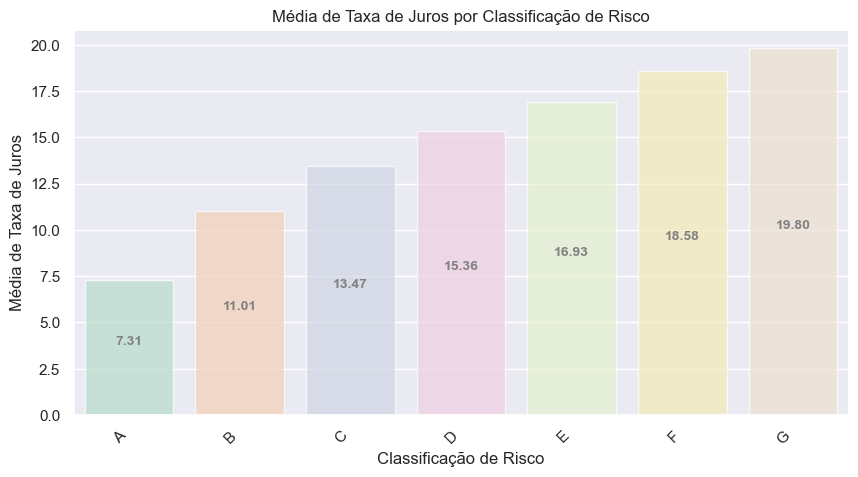

In [24]:
# Calcula a média da taxa de juros por grau de risco.
media_juros = df_geral.groupby('Nivel_Risco', observed=False)['Taxa_Juros'].mean().reset_index()

# Criando a figura.
plt.figure(figsize=(10, 5))

# Cria o gráfico de barras.
ax = sns.barplot(x='Nivel_Risco', y='Taxa_Juros', data=media_juros, hue='Nivel_Risco', palette='Pastel2', alpha=0.7, legend=False)

# Adicionan os valores das médias acima das barras.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='grey')

# Personaliza o gráfico.
ax.set_xlabel('Classificação de Risco')
ax.set_ylabel('Média de Taxa de Juros')
ax.set_title('Média de Taxa de Juros por Classificação de Risco')

# Ajusta a rotação dos rótulos do eixo X corretamente.
ax.set_xticks(ax.get_xticks()) # Define os ticks antes de modificar os rótulos.
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Exibe o gráfico.
plt.show()

Como extensão da análise anterior, quanto maior o nível de risco, maior o juros médio vinculado ao valor do crédito. Tendo em vista o quão alta é a probabilidade de inadimplência, as instituições definem a aplicação da alíquota de juros como parte da estratégia de risco e retorno. 

## Faixa de Renda

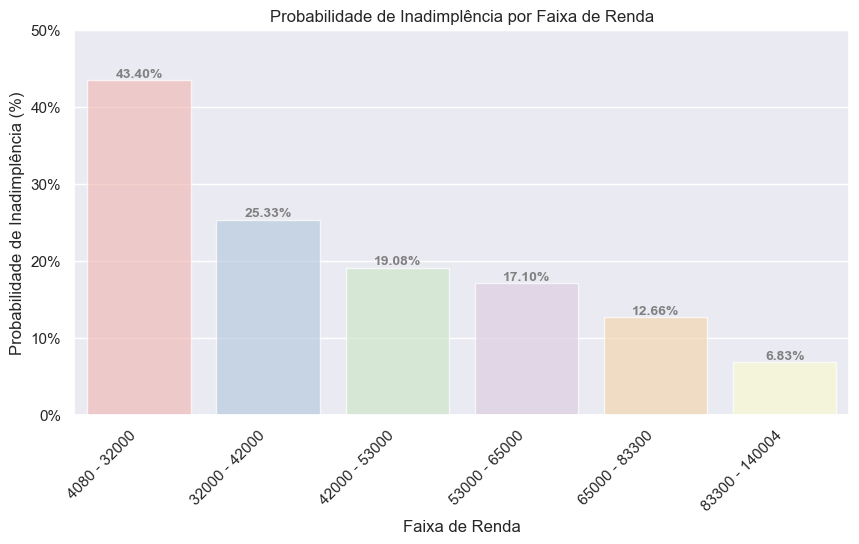

In [25]:
# Cria as faixas de idade usando qcut.
df_geral['Faixa_Renda'], bins = pd.qcut(df_geral['Renda_Anual'], q=6, duplicates='drop', retbins=True)

# Cria rótulos personalizados no formato "min - max".
faixa_labels = [f"{int(bins[i])} - {int(bins[i+1])}" for i in range(len(bins)-1)]

# Mapeia os rótulos formatados para as categorias existentes.
mapa_labels = {old: new for old, new in zip(sorted(df_geral['Faixa_Renda'].unique()), faixa_labels)}
df_geral['Faixa_Renda'] = df_geral['Faixa_Renda'].map(mapa_labels)

# Calcula a probabilidade de inadimplência por faixa de renda.
media_status_inad = df_geral.groupby('Faixa_Renda', observed=False)['Status_Inadimplencia_Emprestimo'].mean() * 100
media_status_inad = media_status_inad.reset_index()

# Cria a figura.
plt.figure(figsize=(10, 5))

# Cria o gráfico de barras sem a legenda.
ax = sns.barplot(x='Faixa_Renda', y='Status_Inadimplencia_Emprestimo', data=media_status_inad, hue='Faixa_Renda', palette='Pastel1', alpha=0.7, legend=False)

# Adiciona os valores das médias acima das barras.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='grey')

# Personaliza o gráfico.
ax.set_xlabel('Faixa de Renda')
ax.set_ylabel('Probabilidade de Inadimplência (%)')
ax.set_title('Probabilidade de Inadimplência por Faixa de Renda')

# Formata o eixo Y como porcentagem.
ticks = ax.get_yticks()
y_labels = [f'{int(y)}%' for y in ticks]
ax.set_yticks(ticks)
ax.set_yticklabels(y_labels)

# Ajusta a rotação dos rótulos do eixo X corretamente.
ax.set_xticks(range(len(faixa_labels))) # Define os ticks corretamente.
ax.set_xticklabels(faixa_labels, rotation=45, ha='right')

# Exibe o gráfico.
plt.show()

Por meio da análise acima, que define a probabilidade de inadimplência para o público de cada faixa de renda, nota-se que, ao passo em que a Renda Anual aumenta, a probabilidade diminui. Sendo assim, o intervalo de renda com menor probabilidade de inadimplência é o de 83.300 a 140.004.

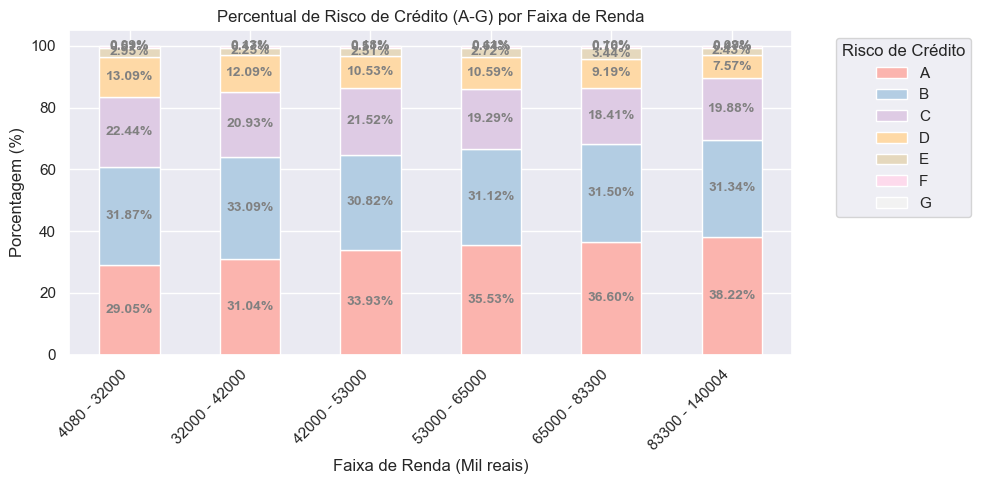

Nivel_Risco                  A          B          C          D         E  \
Faixa_Renda                                                                 
(4079.999, 32000.0]  29.050033  31.871281  22.437734  13.092352  2.953493   
(32000.0, 42000.0]   31.040683  33.086087  20.926051  12.092605  2.247696   
(42000.0, 53000.0]   33.928178  30.821767  21.524565  10.530954  2.511566   
(53000.0, 65000.0]   35.533648  31.118731  19.288470  10.587227  2.721817   
(65000.0, 83300.0]   36.603325  31.496437  18.408551   9.192399  3.444181   
(83300.0, 140004.0]  38.217556  31.337950  19.879384   7.572035  2.434666   

Nivel_Risco                 F         G  
Faixa_Renda                              
(4079.999, 32000.0]  0.506943  0.088164  
(32000.0, 42000.0]   0.472016  0.134862  
(42000.0, 53000.0]   0.506720  0.176250  
(53000.0, 65000.0]   0.642949  0.107158  
(65000.0, 83300.0]   0.760095  0.095012  
(83300.0, 140004.0]  0.469064  0.089346  


In [26]:
# Cria as faixas de idade usando qcut.
df_geral['Faixa_Renda'], bins = pd.qcut(df_geral['Renda_Anual'], q=6, duplicates='drop', retbins=True)

# Cria os rótulos personalizados no formato "min - max".
faixa_labels = [f"{int(bins[i])} - {int(bins[i+1])}" for i in range(len(bins)-1)]

# Realiza a contagem das classificações de risco para cada faixa de renda.
contagem_all = df_geral.groupby(['Faixa_Renda', 'Nivel_Risco'], observed=False).size().unstack(fill_value=0)

# Calcula as proporções para cada faixa de renda.
proporcao_all = contagem_all.div(contagem_all.sum(axis=1), axis=0) * 100

# Plota o gráfico.
fig, ax = plt.subplots(figsize=(10, 5))
proporcao_all.plot(kind='bar', stacked=True, ax=ax, cmap="Pastel1", legend=True)
ax.set_title('Percentual de Risco de Crédito (A-G) por Faixa de Renda')
ax.set_ylabel('Porcentagem (%)')
ax.set_xlabel('Faixa de Renda (Mil reais)')

# Ajusta a legenda para fora do gráfico.
ax.legend(title="Risco de Crédito", bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajusta a rotação dos rótulos do eixo X corretamente.
ax.set_xticklabels(faixa_labels, rotation=45, ha='right')

# Adiciona os rótulos de porcentagem.
for i in range(len(proporcao_all)):
    for j in range(len(proporcao_all.columns)):
        # Exibe as porcentagens no gráfico.
        percentage = proporcao_all.iloc[i, j]
        ax.text(i, proporcao_all.iloc[i, :j].sum() + proporcao_all.iloc[i, j] / 2,
                f'{percentage:.2f}%', ha='center', va='center', fontsize=10, color='grey', fontweight='bold')

# Exibe o gráfico.
plt.tight_layout()
plt.show()

print(proporcao_all)

Na instituição financeira, cujos dados são aqui analisados, cada um dos requerentes é classificado a partir de seis níveis de risco de crédito, que vão de A, o de menor risco, a G, o de maior risco. Quando relacionados às faixas de renda dos requerentes, nota-se que, de forma geral, os indivíduos definidos como de baixo risco são maioria, e os de alto risco, minoria. Com exceção da população com renda entre 4.080 a 32.000 e entre 32.000 - 42.000, composta majoritariamente por indivíduos de nível B, todas as demais contam com uma maioria de solicitantes tipo A. Os indivíduos de grau C posicionam-se como o terceiro grupo mais representativo entre todas as faixas de renda, assim como, os de grau D, apresentam-se como o quarto. Quanto aos níveis mais altos de risco, o grupo de nível E posiciona-se como o quinto maior, contando com percentuais muito semelhantes entre as faixas de renda (2,44% - 2,95%); o grupo de nível F, posiciona-se como sexto e penúltimo, e G como o com menor representação nas diferentes faixas de renda.

Em termos absolutos, a faixa com o maior percentual de indivíduos A é a daqueles que recebem entre 83.300K e 14.004K (38,22%). Já, quanto ao nível B, a faixa com maior percentual é a de rendas entre 32.000 a 42.000 (33,09%). O maior percentual para o nível C ocorre no intervalo entre 4.080 a 32.000 (22,44%) e, para o nível D, o maior percentual pertence, também, à faixa de 4.080 a 32.000 (13,09%). Por fim, observa-se que os maiores percentuais para os níveis de risco E, F e G, ocorrem, respectivamente, nas faixas de 32.000 a 42.000 (Grau E - 2,95%), novamente de 65.000 e 83.300 (Grau F - 0,76%) e de 42,000 e 53,000 (Grau G - 0,17%).

## Status de Propriedade da Casa

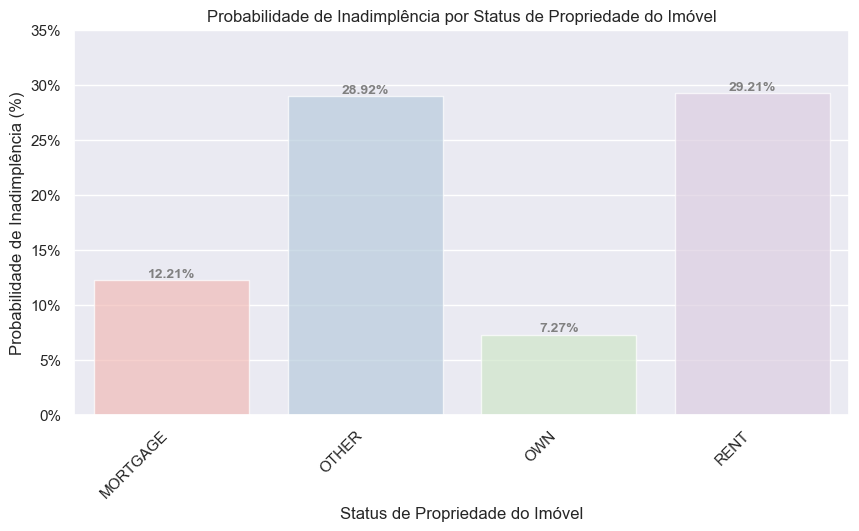

In [27]:
# Calcula a probabilidade de inadimplência por status de propriedade.
media_status_inad = df_geral.groupby('Status_Propriedade_Imovel', observed=False)['Status_Inadimplencia_Emprestimo'].mean() * 100
media_status_inad = media_status_inad.reset_index()

# Cria a figura.
plt.figure(figsize=(10, 5))

# Cria o gráfico de barras.
ax = sns.barplot(x='Status_Propriedade_Imovel', y='Status_Inadimplencia_Emprestimo', data=media_status_inad, hue='Status_Propriedade_Imovel', palette='Pastel1', alpha=0.7, legend=False)

# Adiciona os valores de probabilidade acima das barras.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='grey')

# Inclui os títulos do gráfico e dos eixos.
ax.set_xlabel('Status de Propriedade do Imóvel')
ax.set_ylabel('Probabilidade de Inadimplência (%)')
ax.set_title('Probabilidade de Inadimplência por Status de Propriedade do Imóvel')

# Formata o eixo Y como porcentagem.
ticks = ax.get_yticks()
y_labels = [f'{int(y)}%' for y in ticks]
ax.set_yticks(ticks)
ax.set_yticklabels(y_labels)

# Ajusta a rotação dos rótulos do eixo X corretamente.
ax.set_xticks(ax.get_xticks()) # Define os ticks antes de modificar os rótulos.
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Exibe o gráfico.
plt.show()

O gráfico acima tem a função de relacionar o status de inadimplência dos requerentes aos seus status de propriedade. Após interpretá-lo, conclui-se que o público com status 'Rent' é o que apresenta a maior porcentagem de inadimplentes (29,21%) e, entre o de 'Other', a segunda maior (28,92%). Na terceira posição situa-se a categoria 'Mortgage' e, na quarta, 'Own', que contam com, respectivamente, 12,21% e 7,27% de seus públicos compostos por pessoas que apresentam inadimplência em seu histórico.

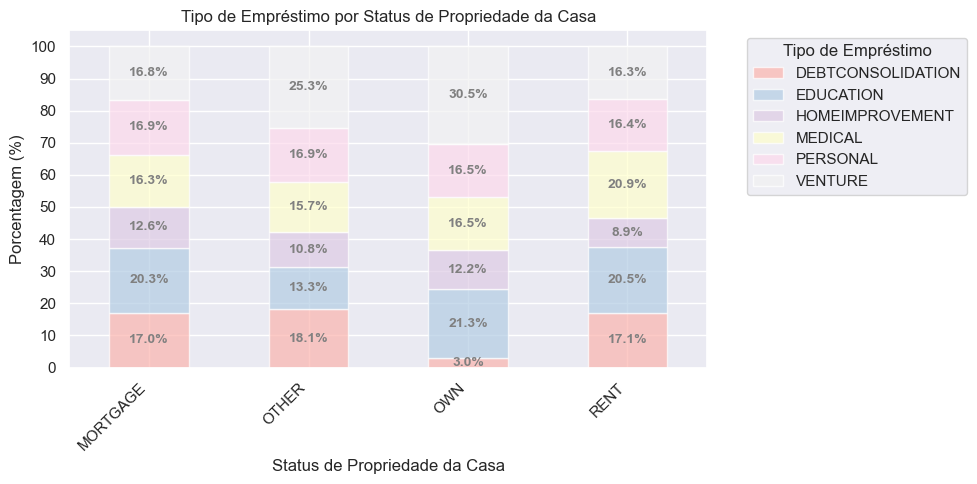

In [28]:
# Conta e calcula as porcentagens.
contagem_inadimplencia = df_geral.groupby(["Status_Propriedade_Imovel", "Modalidade_Credito"], observed=False).size().unstack()
porcentagem_inadimplencia = contagem_inadimplencia.div(contagem_inadimplencia.sum(axis=1), axis=0) * 100

# Crian o gráfico de barras empilhadas.
fig, ax = plt.subplots(figsize=(10, 5))
porcentagem_inadimplencia.plot(kind="bar", stacked=True, ax=ax, cmap="Pastel1", alpha=0.7)

# Adiciona os valores nas barras como porcentagem.
for container, column in zip(ax.containers, porcentagem_inadimplencia.columns):
    labels = [f'{v:.1f}%' if v > 0 else '' for v in porcentagem_inadimplencia[column]]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10,  color='grey', fontweight='bold')

# Formata o eixo Y como porcentagem.
ax.set_yticks(np.arange(0, 101, 10))
ax.set_yticklabels([f'{x}' for x in range(0, 101, 10)])

# Ajusta a rotação dos rótulos do eixo X corretamente.
ax.set_xticks(ax.get_xticks()) # Define os ticks antes de modificar os rótulos.
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Inclui os títulos do gráfico e dos eixos.
ax.set_xlabel("Status de Propriedade da Casa")
ax.set_ylabel("Porcentagem (%)")
ax.set_title("Tipo de Empréstimo por Status de Propriedade da Casa")

# Posiciona a legenda fora do gráfico.
plt.legend(title="Tipo de Empréstimo", bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibe o gráfico.
plt.tight_layout()
plt.show()

Vinculando, agora, as modalidades de empréstimo ao status de propriedade da casa, observa-se que, entre os que contam com o imóvel hipotecado, a maioria, 20,3% dos créditos requeridos, são estudantis ('Education'), seguido, com 17%, da modalidade 'Debtconsolidation', como segundo mais solicitado. Na terceira posição (16,9%), encontra-se a modalidade 'Venture', com 16,8% de representatividade, 'Medical', na quarta posição, com 16,3%, e 'Homeimprovement', na última posição com 12,6%. 

Já o público abarcado pela categoria 'Other', apresenta 'Venture' como a modalidade de crédito mais popular (25,3%); 'Debtconsolidation', como a segunda (18,1%) e 'Personal' como a terceira (16,9%). Como a quarta mais solicitada, apresenta-se 'Medical', com 15,7%; 'Education', com 13,3%, como a quinta e, 'Homeimprovement', com 10,8%, como a sexta.

Aqueles que possuem casa própria (Own) tem a maior propensão de contrair empréstimos do tipo 'Venture' (30,5%), a segunda maior de contrair os do tipo 'Education' (21,3%) e a terceira maior para os do tipo 'Debtconsolidation' e 'Medical' (16,5%). Como o quarto empréstimo mais popular, apresenta-se 'Homeimprovement', com 12,2% de representação, e, em quinta posição, 'Debtconsolidation', com (3%). 

Entre os que alugam (Rent), o tipo mais comum de crédito (20,9%) é 'Medical', seguido do tipo 'Education' com 20,5% e, em terceiro lugar, 'Debtconsolidation' (17,1%). Na quarta colocação situam-se os empréstimos do tipo 'Personal' (16,4%), na quinta os 'Venture' (16,3%) e na sexta 'Homeimprovement' (8,9%).

## Modalidade de Crédito

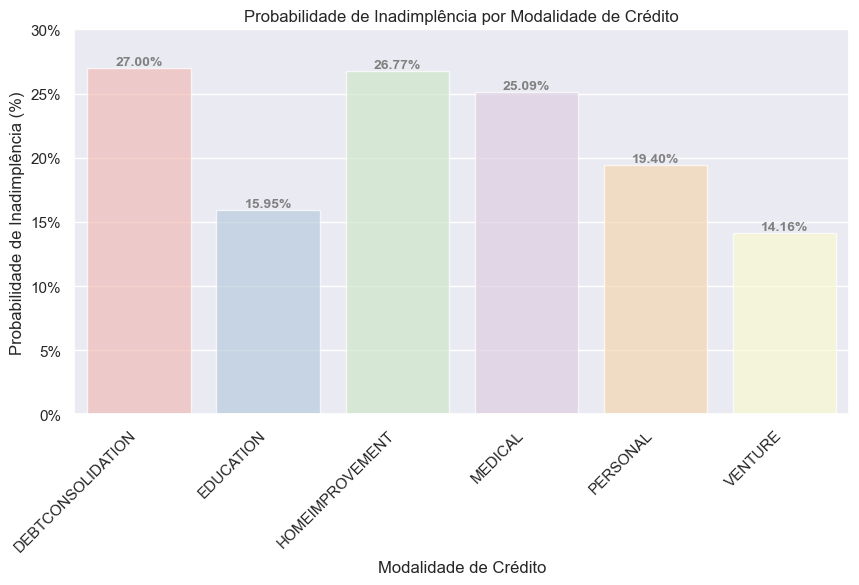

In [29]:
# Calculando a probabilidade de inadimplência por modalidade de crédito.
media_status_inad = df_geral.groupby('Modalidade_Credito', observed=False)['Status_Inadimplencia_Emprestimo'].mean() * 100
media_status_inad = media_status_inad.reset_index()

# Cria a figura.
plt.figure(figsize=(10, 5))

# Cria o gráfico de barras.
ax = sns.barplot(x='Modalidade_Credito', y='Status_Inadimplencia_Emprestimo', data=media_status_inad, hue='Modalidade_Credito', palette='Pastel1', alpha=0.7, legend=False)

# Adiciona os valores das médias acima das barras.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='grey')

# Inclui os títulos do gráfico e dos eixos.
ax.set_xlabel('Modalidade de Crédito')
ax.set_ylabel('Probabilidade de Inadimplência (%)')
ax.set_title('Probabilidade de Inadimplência por Modalidade de Crédito')

# Formata o eixo Y como porcentagem.
ticks = ax.get_yticks()
y_labels = [f'{int(y)}%' for y in ticks]
ax.set_yticks(ticks)
ax.set_yticklabels(y_labels)

# Ajusta a rotação dos rótulos do eixo X corretamente.
ax.set_xticks(ax.get_xticks()) # Define os ticks antes de modificar os rótulos.
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Exibe o gráfico.
plt.show()

É possível concluir, a partir da análise realizada, que a modalidade com menor chance de apresentar inadimplência corresponde a 'Venture'. Em seguida, em ordem crescente, a segunda menor probabilidade corresponde a da modalidade 'Education'; a terceira, à 'Personal' e a quarta, à 'Medical'. A quinta menor probabilidade, corresponde a de 'Homeimprovement' e a sexta, à 'Debtconsolidation'. Uma possível explicação para as três modalidades cujas chances de inadimplência são maiores é que 'Medical', 'Homeimprovement' e 'Debtconsolidation' são categorias de crédito mais relacionadas à situações emergenciais e, consequentemente, são empréstimos adquiridos sem muito planejamento, o que reflete em altas taxas de inadimplência.

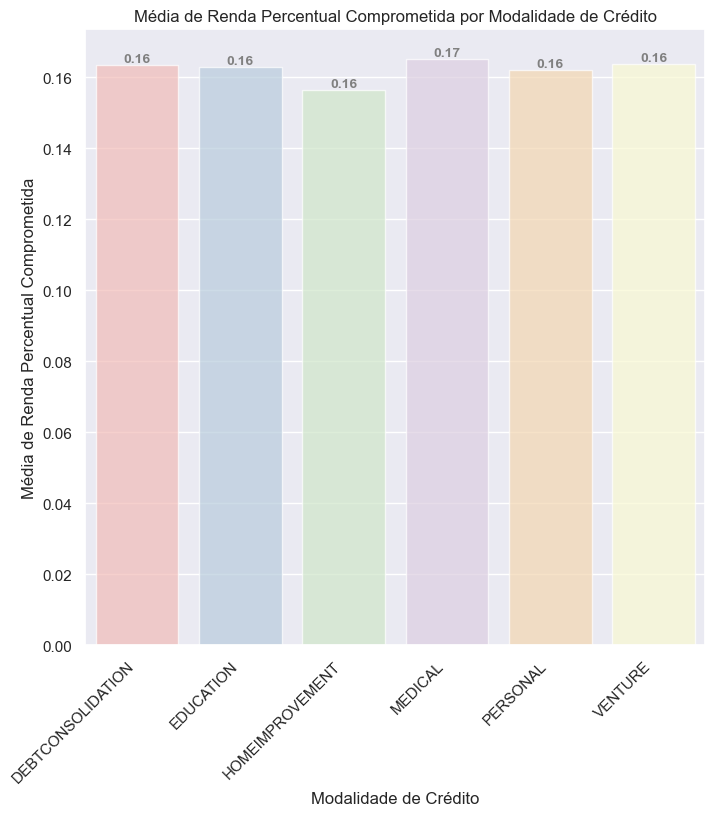

In [30]:
# Calcula a média do percentual de renda comprometida agrupada por modalidade de crédito.
media_renda_percentual = df_geral.groupby('Modalidade_Credito')['Percentual_Renda_Comprometida'].mean().reset_index()

# Cria a figura.
plt.figure(figsize=(8, 8))

# Cria o gráfico de barras.
ax = sns.barplot(
    x='Modalidade_Credito', 
    y='Percentual_Renda_Comprometida', 
    data=media_renda_percentual, 
    hue='Modalidade_Credito', 
    palette='Pastel1', 
    alpha=0.7, 
    legend=False
)

# Adiciona os valores nas barras com formato correto.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='grey', fontweight='bold')

# Inclui os títulos do gráfico e dos eixos.
ax.set_xlabel("Modalidade de Crédito")
ax.set_ylabel("Média de Renda Percentual Comprometida")
ax.set_title("Média de Renda Percentual Comprometida por Modalidade de Crédito")

# Ajusta a rotação dos rótulos do eixo X corretamente.
ax.set_xticks(ax.get_xticks()) # Define os ticks antes de modificar os rótulos.
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Exibe o gráfico
plt.show()

Comparando as diferentes modalidades de crédito quanto ao percentual médio de renda comprometido, conclui-se que há bastante semelhanças entre as modalidades. De todas, apenas os empréstimos médicos apresentam um comprometimento médio igual a 0,17%. Todas as outras contam com 0,16% de comprometimento.

## Inadimplência Histórica

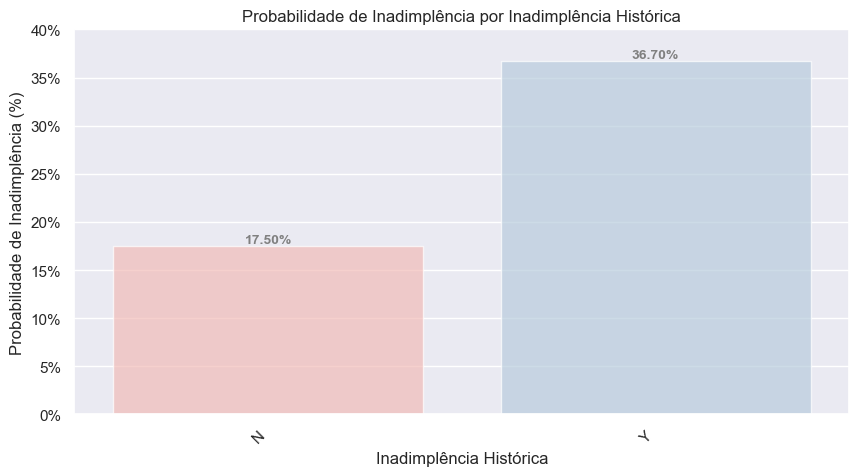

In [31]:
# Calculando a probabilidade de inadimplência.
media_status_inad = df_geral.groupby('Inadimplencia_Historica', observed=False)['Status_Inadimplencia_Emprestimo'].mean() * 100
media_status_inad = media_status_inad.reset_index()

# Cria a figura.
plt.figure(figsize=(10, 5))

# Cria o gráfico de barras.
ax = sns.barplot(x='Inadimplencia_Historica', y='Status_Inadimplencia_Emprestimo', data=media_status_inad, hue='Inadimplencia_Historica', palette='Pastel1', alpha=0.7, legend=False)

# Adiciona os valores das médias acima das barras.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='grey')

# Inclui os títulos do gráfico e dos eixos.
ax.set_xlabel('Inadimplência Histórica')
ax.set_ylabel('Probabilidade de Inadimplência (%)')
ax.set_title('Probabilidade de Inadimplência por Inadimplência Histórica')

# Formata o eixo Y como porcentagem.
ticks = ax.get_yticks()
y_labels = [f'{int(y)}%' for y in ticks]
ax.set_yticks(ticks)
ax.set_yticklabels(y_labels)

# Ajusta rotação dos rótulos do eixo X corretamente.
ax.set_xticks(ax.get_xticks()) # Define os ticks antes de modificar os rótulos.
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Exibe o gráfico.
plt.show()

O que a análise acima expõem é a relação entre o histórico de inadimplência dos requerentes e seu atual status de inadimplência. Logo, a partir destas informações, é possível constatar que, considerando o público cujo histórico já acusou inadimplência em algum momento, 36,7% é, atualmente, inadimplente. Por outro lado, o público que nunca apresentou inadimplência, tem, atualmente, 17,5% dos indivíduos em falta com os pagamentos. Essas observações indicam que, entre os dois públicos, com e sem inadimplência em seus históricos, aqueles em que consta falta de pagamento em ocasiões pretéritas, tem o dobro de probabilidade, a priori, de ser inadimplente atualmente e no futuro. 

## Faixa Etária 

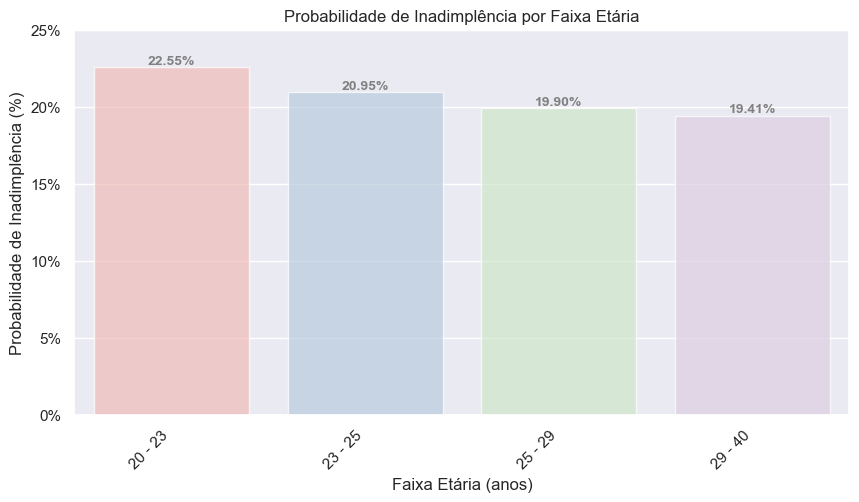

In [32]:
# Cria as faixas de idade usando qcut.
df_geral['Faixa_Etaria'], bins = pd.qcut(df_geral['Idade'], q=4, duplicates='drop', retbins=True)

# Cria rótulos personalizados no formato "min - max".
faixa_labels = [f"{int(bins[i])} - {int(bins[i+1])}" for i in range(len(bins)-1)]

# Calcula a média da probabilidade de inadimplência por faixa etária.
media_status_inad = df_geral.groupby('Faixa_Etaria', observed=False)['Status_Inadimplencia_Emprestimo'].mean() * 100
media_status_inad = media_status_inad.reset_index()

# Cria a figura.
plt.figure(figsize=(10, 5))

# Cria o gráfico de barras.
ax = sns.barplot(x='Faixa_Etaria', y='Status_Inadimplencia_Emprestimo', data=media_status_inad, hue='Faixa_Etaria', palette='Pastel1', alpha=0.7, legend=False)

# Adiciona os valores das médias acima das barras.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='grey')

# Inclui os títulos do gráfico e dos eixos.
ax.set_xlabel('Faixa Etária (anos)')
ax.set_ylabel('Probabilidade de Inadimplência (%)')
ax.set_title('Probabilidade de Inadimplência por Faixa Etária')

# Formata o eixo Y como porcentagem.
ticks = ax.get_yticks()
y_labels = [f'{int(y)}%' for y in ticks]
ax.set_yticks(ticks)
ax.set_yticklabels(y_labels)

# Ajusta rotação dos rótulos do eixo X corretamente.
ax.set_xticks(ax.get_xticks()) # Define os ticks antes de modificar os rótulos.
ax.set_xticklabels(faixa_labels, rotation=45, ha='right')

# Exibe o gráfico.
plt.show()

Quando relacionada às faixas etárias, a menor probabilidade de inadimplência encontra-se entre as idades de 29 - 40 anos (19,41%), a segunda menor entre 25 - 29 (19,90%), a terceira, entre 23 - 25 (20,95%) e, a maior, entre 20 e 23 anos (22,55%). 

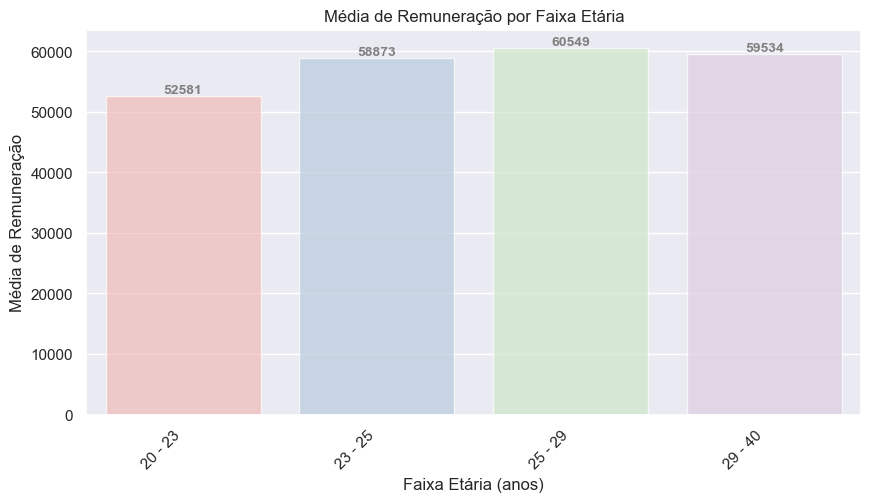

In [33]:
# Cria as faixas de idade usando qcut.
df_geral['Faixa_Etaria'], bins = pd.qcut(df_geral['Idade'], q=4, duplicates='drop', retbins=True)

# Cria rótulos personalizados no formato "min - max".
faixa_labels = [f"{int(bins[i])} - {int(bins[i+1])}" for i in range(len(bins)-1)]

# Calcula a média da remuneração por faixa etária.
df_media = df_geral.groupby('Faixa_Etaria', observed=False)['Renda_Anual'].mean().reset_index()
df_media.columns = ['Faixa_Etaria', 'Média_Renda']

# Cria o gráfico de barras.
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df_media, x="Faixa_Etaria", y="Média_Renda", hue='Faixa_Etaria', palette='Pastel1', alpha=0.7, legend=False)

# Adiciona os valores das porcentagens dentro das barras.
for bar in ax.containers:
    ax.bar_label(bar, fmt="%.0f", label_type="edge", fontsize=10, color="grey", fontweight="bold")

# Inclui os títulos do gráfico e dos eixos.
ax.set_xlabel("Faixa Etária (anos)")
ax.set_ylabel("Média de Remuneração")
ax.set_title("Média de Remuneração por Faixa Etária")

# Ajusta rotação dos rótulos do eixo X corretamente.
ax.set_xticks(ax.get_xticks()) # Define os ticks antes de modificar os rótulos.
ax.set_xticklabels(faixa_labels, rotation=45, ha='right')

# Exibe o gráfico.
plt.show()

O gráfico de barras acima apresenta a média de remuneração anual para as quatro faixas etárias definidas no eixo X e indica que as maiores rendas são de indivíduos entre 25 e 29 anos (60.549) e entre 29 e 40 anos (59.534). Porém, as outras duas faixas, com remunerações menores, não destoam tanto das maiores, o que indica uma grande similaridade de renda entre as quatro faixas etárias. 

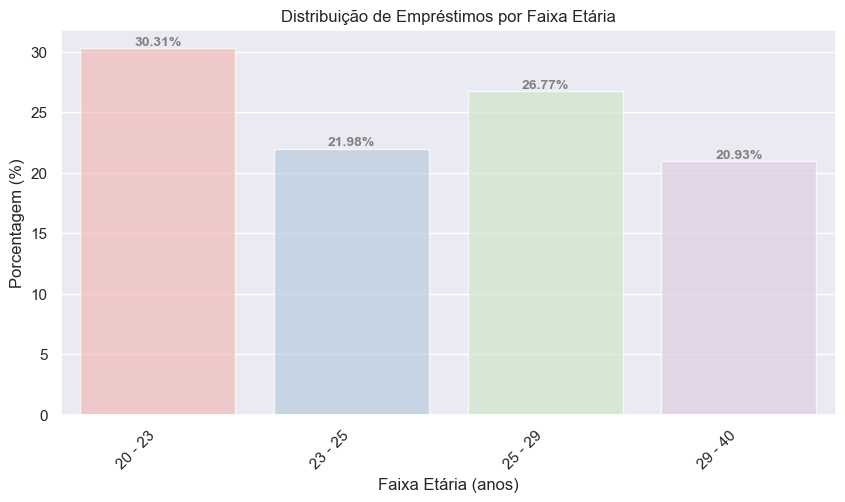

In [34]:
# Cria as faixas de idade usando qcut.
df_geral['Faixa_Etaria'], bins = pd.qcut(df_geral['Idade'], q=4, duplicates='drop', retbins=True)

# Cria rótulos personalizados no formato "min - max".
faixa_labels = [f"{int(bins[i])} - {int(bins[i+1])}" for i in range(len(bins)-1)]

# Conta a quantidade de registros por faixa etária e calcula a porcentagem.
contagem = df_geral['Faixa_Etaria'].value_counts(normalize=True).sort_index() * 100
df_contagem = contagem.reset_index()
df_contagem.columns = ['Faixa_Etaria', 'Porcentagem']

# Cria o gráfico de barras.
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df_contagem, x="Faixa_Etaria", y="Porcentagem", hue='Faixa_Etaria', palette='Pastel1', alpha=0.7, legend=False)

# Adiciona os valores das porcentagens dentro das barras.
for bar in ax.containers:
    ax.bar_label(bar, fmt="%.2f%%", label_type="edge", fontsize=10, color="grey", fontweight="bold")

# Inclui os títulos do gráfico e dos eixos.
ax.set_xlabel("Faixa Etária (anos)")
ax.set_ylabel("Porcentagem (%)")
ax.set_title("Distribuição de Empréstimos por Faixa Etária")

# Formata o eixo Y como porcentagem.
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}'))

# Ajusta rotação dos rótulos do eixo X corretamente.
ax.set_xticks(ax.get_xticks()) # Define os ticks antes de modificar os rótulos.
ax.set_xticklabels(faixa_labels, rotation=45, ha='right')

# Exibe o gráfico.
plt.show()

Observando a análise apresentada, conclui-se que, da com maior número de empréstimos, para a menor, as faixas etárias revelam-se na seguinte ordem: com 30,31% do total de créditos concedidos encontra-se a faixa de 20 anos a 23 anos; com 26,77%, a de 25 anos a 29 anos; com 21,98%, de 23 anos a 25 ano, e, com 20,93%, indivíduos de 29 anos a 40 anos. 

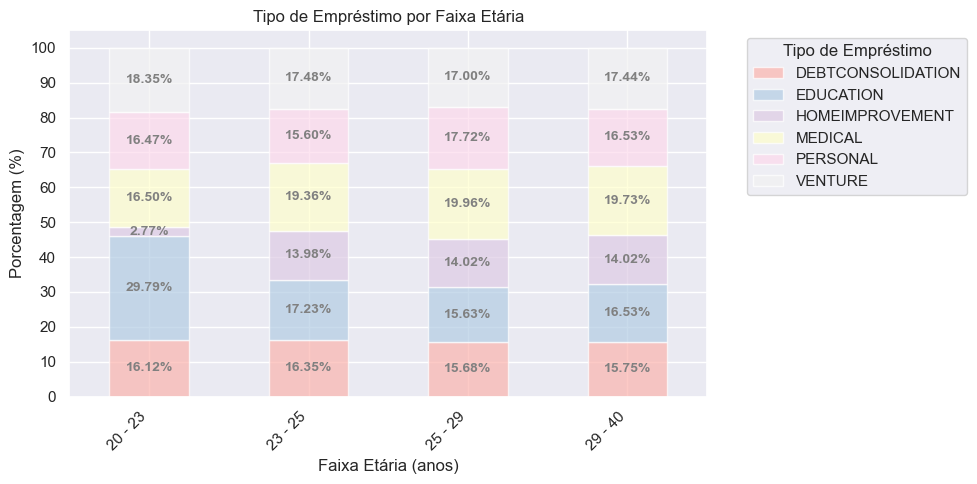

In [35]:
# Cria as faixas de idade usando qcut.
df_geral['Faixa_Etaria'], bins = pd.qcut(df_geral['Idade'], q=4, duplicates='drop', retbins=True)

# Cria rótulos personalizados no formato "min_val - max_val".
faixa_labels = [f"{bins[i]:.0f} - {bins[i+1]:.0f}" for i in range(len(bins)-1)]
df_geral['Faixa_Etaria'] = df_geral['Faixa_Etaria'].cat.rename_categories(faixa_labels)

# Calcula a contagem e a porcentagem por faixa etária.
contagem_intencao = df_geral.groupby(["Faixa_Etaria", "Modalidade_Credito"], observed=False).size().unstack()
porcentagem_intencao = contagem_intencao.div(contagem_intencao.sum(axis=1), axis=0) * 100

# Cria o gráfico de barras empilhadas.
fig, ax = plt.subplots(figsize=(10, 5))
porcentagem_intencao.plot(kind="bar", stacked=True, ax=ax, cmap="Pastel1", alpha=0.7)

# Adiciona os valores nas barras como porcentagem.
for container, column in zip(ax.containers, porcentagem_intencao.columns):
    labels_barras = [f'{v:.2f}%' if v > 0 else '' for v in porcentagem_intencao[column]]
    ax.bar_label(container, labels=labels_barras, label_type='center', fontsize=10, color='grey', fontweight='bold')

# Formata o eixo Y como porcentagem.
ax.set_yticks(np.arange(0, 101, 10))
ax.set_yticklabels([f'{x}' for x in range(0, 101, 10)])

# Ajusta a rotação dos rótulos do eixo X corretamente.
ax.set_xticks(ax.get_xticks()) # Define os ticks antes de modificar os rótulos.
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Inclui os títulos do gráfico e dos eixos.
ax.set_xlabel("Faixa Etária (anos)")
ax.set_ylabel("Porcentagem (%)")
ax.set_title("Tipo de Empréstimo por Faixa Etária")

# Posiciona a legenda fora do gráfico.
plt.legend(title="Tipo de Empréstimo", bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibe o gráfico.
plt.tight_layout()
plt.show()

O gráfico acima foi construído com a finalidade de conhecer a atual distribuição de modalidades de empréstimos por cada faixa etária. Considerando o intervalo de idades dentre 20 e 23 anos, nota-se que o tipo de crédito mais concedido é 'Education' (29,79%), seguido do 'Venture' (18,35%), como o segundo tipo mais popular; na terceira posição, encontra-se créditos na modalidade 'Medical' (16,50%); 'Personal' na quarta (16,47%); 'Debtconsolidation', na quinta (16,12%) e, como a modalidade menos representada, 'Homeimprovement' com 2,77%.

Em seguida, observando o intervalo entre 23 e 25 anos, encontra-se, como o crédito mais popular, os da modalidade 'Medical' (19,36%); como segundo mais expressivo, os da 'Venture' (17,48%); como terceiro, os da categoria 'Education' (17,23%); em quarta colocação, os da modalidade 'Debtconsolidation' (16,35%); na quinta, os empréstimos do tipo 'Personal' (15.6%) e, como último colocado, os do tipo 'Homeimprovement' (13,98%).

Para a faixa etária entre 25 e 29 anos, a modalidade mais comum é a 'Medical' (19,96%), a segunda mais comum 'Personal' (17,72%) e a terceira 'Venture' (17%). Na quarta posição encontra-se 'Debtconsolidation' (15,68%), na quinta 'Education' (15,63%) e na sexta, e última, 'Homeimprovement' com 14,02%.

No que diz respeito à faixa entre 29 e 40 anos, 'Medical' também apresenta-se como a modalidade mais requisitada (19,73%), 'Venture' como a segunda (17,44%), 'Education' e 'Personal' como a terceira (16,53%). Em quinto lugar situa-se a categoria 'Debtconsolidation' (15,75%) e em sexto 'Homeimprovement' (14,02%). 

## Percentual de Renda Comprometida

In [36]:
valor_max = df_geral['Percentual_Renda_Comprometida'].max()
valor_min = df_geral['Percentual_Renda_Comprometida'].min()

print(valor_max)
print(valor_min)

0.44
0.01


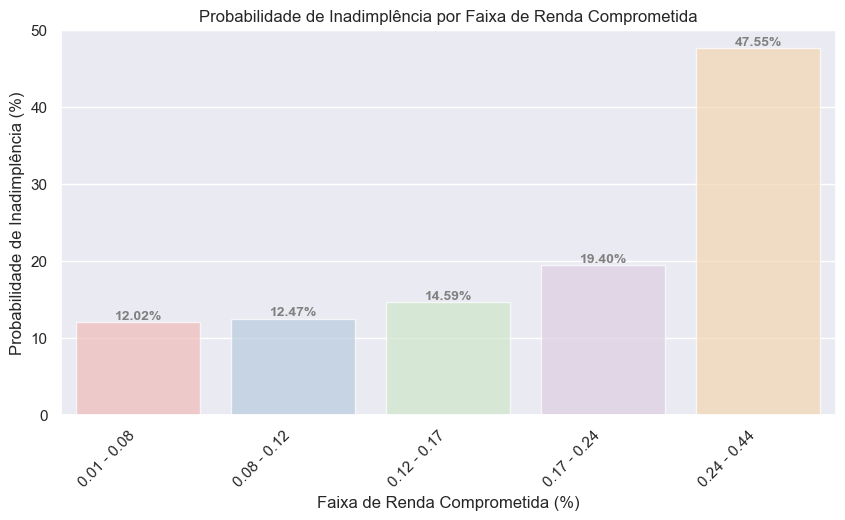

In [37]:
# Cria as faixas de renda comprometida usando qcut.
df_geral['Faixa_Percentual_Renda_Comprometida'], bins = pd.qcut(df_geral['Percentual_Renda_Comprometida'], q=5, duplicates='drop', retbins=True)

# Cria rótulos personalizados no formato "min_val - max_val".
faixa_labels = [f"{bins[i]:.2f} - {bins[i+1]:.2f}" for i in range(len(bins)-1)]
df_geral['Faixa_Percentual_Renda_Comprometida'] = df_geral['Faixa_Percentual_Renda_Comprometida'].cat.rename_categories(faixa_labels)

# Calcula a média da probabilidade de inadimplência por faixa de renda comprometida.
media_status_inad = df_geral.groupby('Faixa_Percentual_Renda_Comprometida', observed=False)['Status_Inadimplencia_Emprestimo'].mean() * 100
media_status_inad = media_status_inad.reset_index()

# Crian a figura.
plt.figure(figsize=(10, 5))

# Cria o gráfico de barras.
ax = sns.barplot(x='Faixa_Percentual_Renda_Comprometida', 
                 y='Status_Inadimplencia_Emprestimo', 
                 data=media_status_inad, 
                 hue='Faixa_Percentual_Renda_Comprometida', 
                 palette='Pastel1', 
                 alpha=0.7,
                 legend=False)

# Adiciona os valores das médias acima das barras.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='grey')

# Inclui os títulos do gráfico e dos eixos.
ax.set_xlabel('Faixa de Renda Comprometida (%)')
ax.set_ylabel('Probabilidade de Inadimplência (%)')
ax.set_title('Probabilidade de Inadimplência por Faixa de Renda Comprometida')

# Formata o eixo Y como porcentagem.
ticks = ax.get_yticks()
y_labels = [f'{int(y)}' for y in ticks]
ax.set_yticks(ticks)
ax.set_yticklabels(y_labels)

# Ajusta a rotação dos rótulos do eixo X corretamente.
ax.set_xticks(range(len(faixa_labels))) # Define os ticks antes de modificar os rótulos.
ax.set_xticklabels(faixa_labels, rotation=45, ha='right')

# Exibe o gráfico.
plt.show()

Sob a ótica dos percentuais de renda comprometida, ao avaliar as probabilidades de inadimplência, observa-se que, quanto maior o impacto sobre a renda dos indivíduos, maior a probabilidade de inadimplência. Sendo assim, para a faixa entre 0,01% - 0,08%, a probabilidade é de 12,02%; entre 0,08% - 0,12% de comprometimento, 12,47%; entre 0,12% - 0,17%, 14,59%; no intervalo de 0,17% - 0,24%, a chance é de 19,4%; e, por último, entre 0,24% - 0,44%, de 47,55%.

## Valor do Empréstimo

In [38]:
valor_max = df_geral['Valor_Emprestimo'].max()
valor_min = df_geral['Valor_Emprestimo'].min()

print(valor_max)
print(valor_min)

23000
500


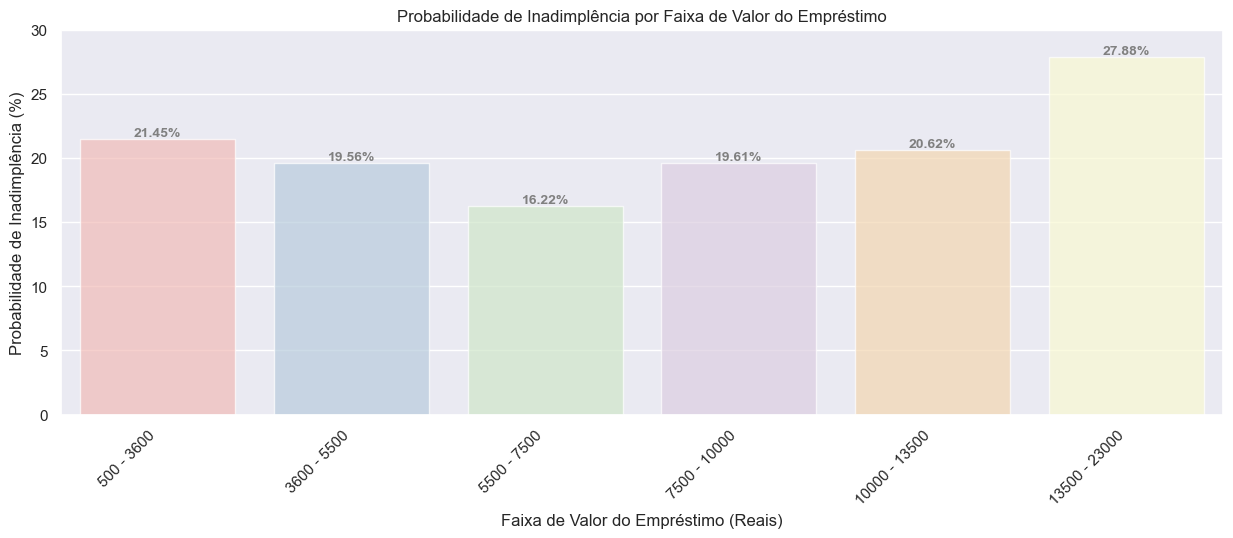

In [39]:
# Cria as faixas de valor do empréstimo usando qcut.
df_geral['Faixa_Valor_Emprestimo'], bins = pd.qcut(df_geral['Valor_Emprestimo'], q=6, duplicates='drop', retbins=True)

# Cria os rótulos personalizados no formato "min_val - max_val".
faixa_labels = [f"{int(bins[i])} - {int(bins[i+1])}" for i in range(len(bins)-1)]
df_geral['Faixa_Valor_Emprestimo'] = df_geral['Faixa_Valor_Emprestimo'].cat.rename_categories(faixa_labels)

# Calcula a média da probabilidade de inadimplência por faixa de renda.
media_status_inad = df_geral.groupby('Faixa_Valor_Emprestimo', observed=False)['Status_Inadimplencia_Emprestimo'].mean() * 100
media_status_inad = media_status_inad.reset_index()

# Cria a figura.
plt.figure(figsize=(15, 5))

# Cria o gráfico de barras.
ax = sns.barplot(x='Faixa_Valor_Emprestimo', 
                 y='Status_Inadimplencia_Emprestimo', 
                 data=media_status_inad, 
                 hue='Faixa_Valor_Emprestimo', 
                 palette='Pastel1', 
                 alpha=0.7,
                 legend=False) 

# Adiciona os valores das médias acima das barras.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='grey')

# Inclui os títulos do gráfico e dos eixos.
ax.set_xlabel('Faixa de Valor do Empréstimo (Reais)')
ax.set_ylabel('Probabilidade de Inadimplência (%)')
ax.set_title('Probabilidade de Inadimplência por Faixa de Valor do Empréstimo')

# Formata o eixo Y como porcentagem.
ticks = ax.get_yticks()
y_labels = [f'{int(y)}' for y in ticks]
ax.set_yticks(ticks)
ax.set_yticklabels(y_labels)

# Ajusta a rotação dos rótulos do eixo X corretamente.
ax.set_xticks(range(len(faixa_labels))) # Define os ticks antes de modificar os rótulos.
ax.set_xticklabels(faixa_labels, rotation=45, ha='right')

# Exibe o gráfico.
plt.show()

Uma vez estabelecido o vínculo entre as faixas de valor dos empréstimos e a probabilidade de inadimplência, obtém-se que concessões entre 5.500 - 7.500 reais são os que apresentam menor chance de não serem pagas (16,22%). Os demais intervalos, em ordem crescente de probabilidade, são: 3.600 - 5.500 reais, em segundo lugar, com 19,56% de chance de inadimplência; 7.500 - 10.000 reais, com 19,61%; 10.000 - 13.500 reais, com 20,62%; 500 - 3.600 reais, com 21,45% e, por fim, os empréstimos cujos valores estão entre 13.500 - 23.000 reais, com 27,88%.

## Histórico de Crédito 

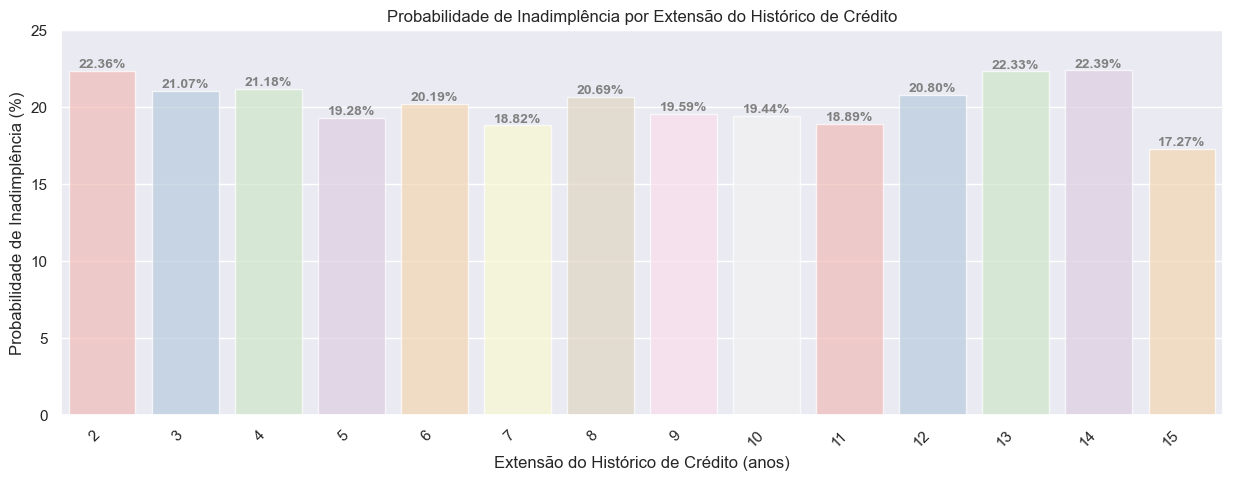

In [40]:
# Calcula a média da probabilidade de inadimplência por extensão do histórico de crédito.
media_status_inad = df_geral.groupby('Extensao_Historico_Credito', observed=False)['Status_Inadimplencia_Emprestimo'].mean() * 100
media_status_inad = media_status_inad.reset_index()

# Cria a figura.
plt.figure(figsize=(15, 5))

# Cria o gráfico de barras.
ax = sns.barplot(x='Extensao_Historico_Credito', y='Status_Inadimplencia_Emprestimo', data=media_status_inad, hue='Extensao_Historico_Credito', palette='Pastel1', alpha=0.7, legend=False)

# Adiciona os valores das médias acima das barras.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='grey')

# Inclui os títulos do gráfico e dos eixos.
ax.set_xlabel('Extensão do Histórico de Crédito (anos)')
ax.set_ylabel('Probabilidade de Inadimplência (%)')
ax.set_title('Probabilidade de Inadimplência por Extensão do Histórico de Crédito')

# Formata o eixo Y como porcentagem.
ticks = ax.get_yticks()
y_labels = [f'{int(y)}' for y in ticks]
ax.set_yticks(ticks)
ax.set_yticklabels(y_labels)

# Ajusta a rotação dos rótulos do eixo X corretamente.
ax.set_xticks(ax.get_xticks()) # Define os ticks antes de modificar os rótulos.
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Exibe o gráfico.
plt.show()

O presente gráfico traz informações sobre como a probabilidade de inadimplência varia de acordo com a extensão do histórico de crédito dos clientes. Dentre todos os períodos apresentados, o que conta com a menor probabilidade é o histórico com extensão de 15 anos. Pontuando-os, em ordem crescente de probabilidade, o top 5 é ordenado da seguinte forma: na segunda posição, histórico com extensão de 7 anos, com 18,82% de probabilidade; 11 anos, com 18,89%; 5 anos, com 19,28% e 10 anos, com 18,89%.

## Período de Permanência Empregado

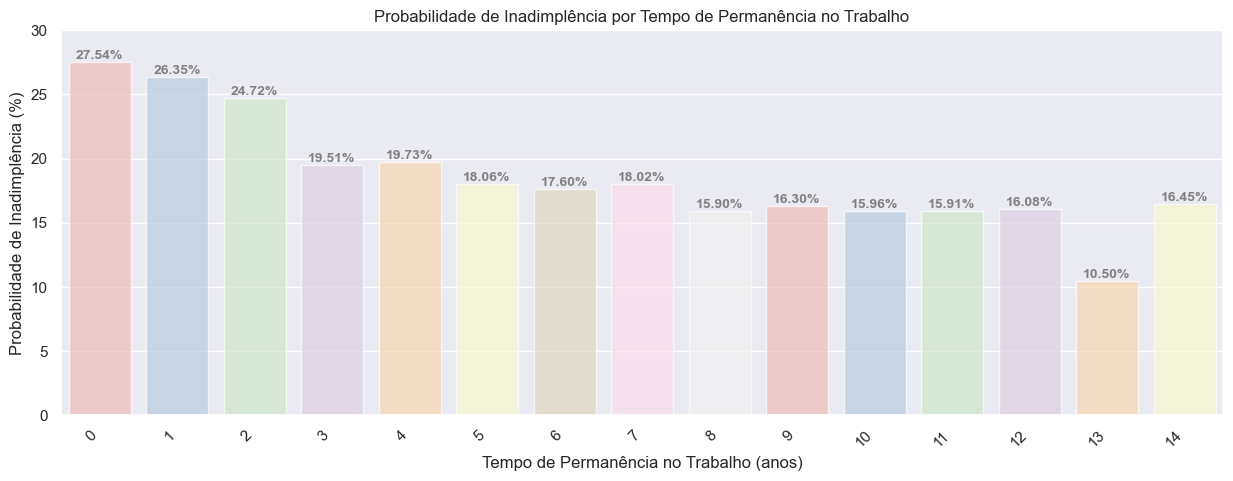

In [41]:
# Calcula a média da probabilidade de inadimplência por tempo de permanência no trabalho.
media_status_inad = df_geral.groupby('Permanencia_Emprego', observed=False)['Status_Inadimplencia_Emprestimo'].mean() * 100
media_status_inad = media_status_inad.reset_index()

# Cria a figura.
plt.figure(figsize=(15, 5))

# Cria o gráfico de barras.
ax = sns.barplot(x='Permanencia_Emprego', y='Status_Inadimplencia_Emprestimo', data=media_status_inad, hue='Permanencia_Emprego', palette='Pastel1', alpha=0.7, legend=False)

# Adiciona os valores das médias acima das barras.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='grey')

# Inclui os títulos do gráfico e dos eixos.
ax.set_xlabel('Tempo de Permanência no Trabalho (anos)')
ax.set_ylabel('Probabilidade de Inadimplência (%)')
ax.set_title('Probabilidade de Inadimplência por Tempo de Permanência no Trabalho')

# Formata o eixo Y como porcentagem.
ticks = ax.get_yticks()
y_labels = [f'{int(y)}' for y in ticks]
ax.set_yticks(ticks)
ax.set_yticklabels(y_labels)

# Ajusta a rotação dos rótulos do eixo X corretamente.
ax.set_xticks(ax.get_xticks()) # Define os ticks antes de modificar os rótulos.
ax.set_xticklabels([int(float(label.get_text())) for label in ax.get_xticklabels()], rotation=45, ha='right')

# Exibe o gráfico.
plt.show()

Na presente análise, o padrão geral de oscilação observado é de redução da probabilidade de inadimplência ao passo em que o tempo de permanência aumenta. Em algumas situações é possível notar que o tempo seguinte apresenta probabilidades maiores do que o anterior, mas, logo em seguida, as chances caem ainda mais. 

Os tempos de permanência que mais se destacam são o de 13 anos, cuja probabilidade é a menor (10,50%); e os com as três maiores probabilidades: 0, 1 e 2, com, respectivamente, 27,54%, 26,35% e 24,72%. 

# Conclusões

In [86]:
# Conta total de clientes em cada grupo.
total_clientes = df_geral.pivot_table(index='Nivel_Risco', 
                                      columns='Faixa_Renda', 
                                      values='Status_Inadimplencia_Emprestimo', 
                                      aggfunc='count', 
                                      fill_value=0,
                                      observed=False)

# Conta total de inadimplentes em cada grupo.
total_inadimplentes = df_geral.pivot_table(index='Nivel_Risco', 
                                           columns='Faixa_Renda', 
                                           values='Status_Inadimplencia_Emprestimo', 
                                           aggfunc='sum',  # Soma para contar os "1" (inadimplentes)
                                           fill_value=0,
                                           observed=False)

# Calcula a porcentagem de inadimplentes.
percentual_inadimplencia = (total_inadimplentes / total_clientes) * 100

# Adiciona a probabilidade total de inadimplência por linha (nível de risco)
percentual_inadimplencia["Total"] = (total_inadimplentes.sum(axis=1) / total_clientes.sum(axis=1)) * 100

# Adiciona a probabilidade total de inadimplência por coluna (faixa de renda)
percentual_inadimplencia.loc["Total"] = (total_inadimplentes.sum(axis=0) / total_clientes.sum(axis=0)) * 100

# Adiciona a probabilidade total geral de inadimplência
percentual_inadimplencia.loc["Total", "Total"] = (total_inadimplentes.sum().sum() / total_clientes.sum().sum()) * 100

# Aplica estilo com coloração para visualização.
styled_table = percentual_inadimplencia.style.background_gradient(cmap='RdYlGn_r').format("{:.2f}%")

# Exibe no Jupyter Lab.
styled_table


Faixa_Renda,"(4079.999, 32000.0]","(32000.0, 42000.0]","(42000.0, 53000.0]","(53000.0, 65000.0]","(65000.0, 83300.0]","(83300.0, 140004.0]",Total
Nivel_Risco,,,,,,,
A,31.94%,12.31%,7.01%,5.19%,2.92%,1.40%,9.33%
B,37.21%,18.21%,14.80%,12.33%,7.01%,3.14%,15.64%
C,38.90%,26.32%,18.94%,14.67%,12.26%,6.85%,20.29%
D,79.46%,65.06%,54.81%,57.49%,50.90%,35.99%,59.61%
E,87.31%,73.00%,66.67%,70.08%,53.79%,36.70%,64.88%
F,91.30%,76.19%,86.96%,76.67%,65.62%,52.38%,74.67%
G,100.00%,83.33%,100.00%,100.00%,100.00%,100.00%,96.77%
Total,43.40%,25.33%,19.08%,17.10%,12.66%,6.83%,20.83%


Com base na análise da matriz de inadimplência, segmentada por níveis de risco e faixas de renda, é possível estruturar uma estratégia de concessão de crédito mais eficaz ao agrupar os clientes em três perfis distintos: conservador, alavancado e mediano. Cada um desses perfis apresenta características próprias de risco e retorno, permitindo uma alocação mais precisa dos produtos financeiros conforme o apetite ao risco da instituição.

1 Cliente Conservador — Baixo risco, alta estabilidade
Esse grupo é composto por clientes com bons indicadores de crédito (níveis de risco A, B e C) e renda elevada, acima de 53 mil reais. Eles apresentam os menores índices de inadimplência, frequentemente abaixo de 15%, mesmo nos cenários econômicos mais adversos. Esses clientes são ideais para produtos com foco em segurança e rentabilidade estável, como crédito consignado, financiamentos com garantias reais ou linhas de crédito com menor retorno, mas alta previsibilidade.

Um destaque dentro desse perfil é o cliente de risco A com renda acima de 65 mil reais, cuja inadimplência é inferior a 3%, evidenciando altíssimo grau de confiabilidade.

2 Cliente Alavancado — Alto risco, alto retorno potencial
Esse perfil representa os clientes com níveis de risco mais elevados (E, F e G), principalmente em faixas de renda abaixo de 65 mil reais. A inadimplência nesse grupo ultrapassa frequentemente os 75%, chegando a 100% no nível G, independentemente da faixa de renda. Trata-se de um público extremamente sensível ao crédito, cuja concessão exige estratégias específicas de mitigação de risco, como garantias adicionais, precificação elevada (spreads altos) e monitoramento contínuo da carteira.

Embora esse perfil represente risco elevado, pode ser explorado em nichos específicos com margens robustas e estratégias agressivas de cobrança e recuperação.

3 Cliente Mediano — Equilíbrio entre risco e oportunidade
Esse grupo ocupa uma posição intermediária, composto por clientes de risco C e D com renda entre 42 mil e 83 mil reais. A inadimplência nesse perfil varia entre 15% e 50%, oferecendo um ponto de equilíbrio entre alcance de mercado e controle de perdas. São clientes que podem ser trabalhados com linhas de crédito moderadas, eventualmente associadas a garantias parciais ou mecanismos de proteção de crédito, como seguros.

Esse público permite maior penetração comercial com um risco relativamente gerenciável, sendo ideal para ampliar a base de clientes mantendo a sustentabilidade da carteira de crédito.